In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Here we go again!!! 
## Time to get creative and help our fellow mates stuck in space!!! Come onnn, take my hand....

![saving](https://pyxis.nymag.com/v1/imgs/00a/407/065c31c680d938dd607e42f8f1f8b58c81-15-star-wars-best-moments-2.rsquare.w700.jpg)

In [2]:
# import libraries to move forward and analyze the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Initial inspection of the data

In [3]:
def change_path(path):
    if path:
        directory_train = '/kaggle/input/spaceship-titanic/train.csv'
        directory_test = '/kaggle/input/spaceship-titanic/test.csv'
    else:
        directory_train =  'train.csv'
        directory_test = 'test.csv'
    
    return directory_train, directory_test

In [4]:
path = False

In [5]:
train, test = change_path(path)

In [6]:
train_df = pd.read_csv(train)

In [7]:
test_df = pd.read_csv(test)

In [8]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Data Field Description

#### `PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.
#### `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
#### `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
#### `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
#### `Destination` - The planet the passenger will be debarking to.
#### `Age` - The age of the passenger.
#### `VIP` - Whether the passenger has paid for special VIP service during the voyage.
#### `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
#### `Name` - The first and last names of the passenger.
#### `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [9]:
train_df.shape  # Number of rows and columns in data

(8693, 14)

In [10]:
train_df.describe()  # More information about numerical data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
train_df.info()  # information about all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [12]:
train_df.isnull().sum()  # Total number of missing observations in the data

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

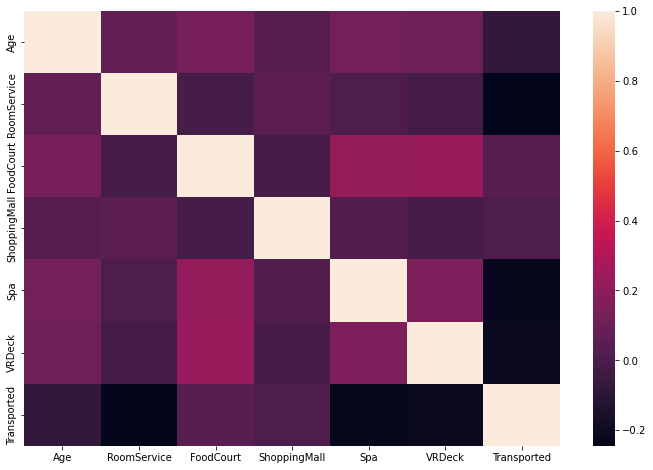

In [13]:
space_torr = train_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(space_torr)

# Let's dig up each column out of the data and find out its story

# Homeplanet

In [14]:
HomePlanet = train_df.HomePlanet

In [15]:
print(f'{round(HomePlanet.isnull().sum() / len(HomePlanet) * 100 , 2)}% data is missing or {HomePlanet.isnull().sum()} values out of {len(HomePlanet)}')

2.31% data is missing or 201 values out of 8693


#### 2.31% data is missing or 201 values out of 8693

In [16]:
HomePlanet.describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [17]:
HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

Text(0.5, 1.0, 'Distribution of passengers from different home planets')

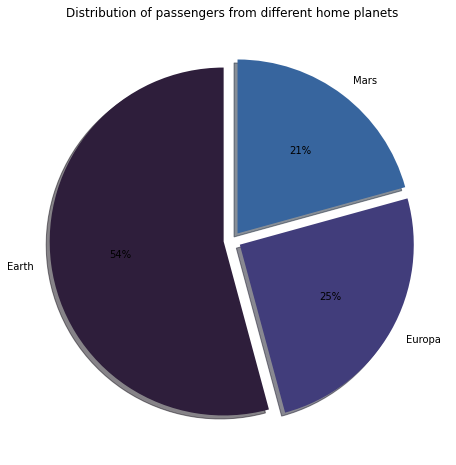

In [18]:
plt.figure(figsize=(12,8))
colors = sns.color_palette('mako')
explode = (0.05, 0.05, 0.05)
plt.pie(x = HomePlanet.value_counts().values, labels=HomePlanet.value_counts().index,
        explode=explode,startangle=90, colors=colors, shadow=True, autopct='%.0f%%')
plt.title('Distribution of passengers from different home planets')

Text(0, 0.5, 'Room service expenditure')

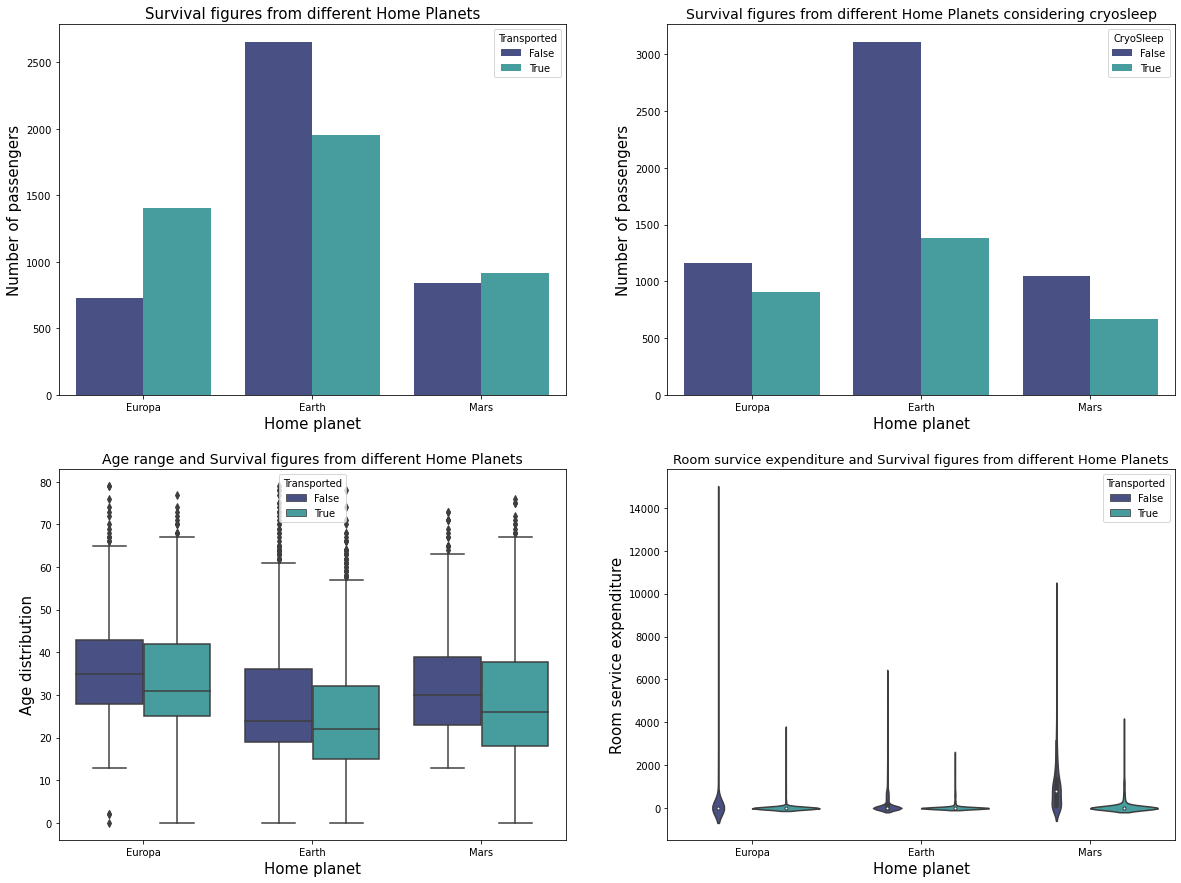

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(x = HomePlanet, hue = train_df.Transported, palette="mako")
plt.title('Survival figures from different Home Planets', fontsize=15)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
# Among the people in space, most of the people who survived and also who died are from Earth. But safest, departure seems to be the earth.

plt.subplot(2,2,2)
sns.countplot(x = HomePlanet, hue = train_df.CryoSleep, palette="mako")
plt.title('Survival figures from different Home Planets considering cryosleep', fontsize=14)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)
# majority of people who were in cryosleep survived in contrast to the people who were not.

plt.subplot(2,2,3)
sns.boxplot(x = HomePlanet, y = train_df.Age, hue = train_df.Transported,  palette="mako")
plt.title('Age range and Survival figures from different Home Planets', fontsize=14)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Age distribution', fontsize=15)

# Looks like Age is similarly distributed between different homeplanets and people who got transported.

plt.subplot(2,2,4)
sns.violinplot(x = HomePlanet, y = train_df.RoomService, hue= train_df.Transported, palette='mako')
plt.title('Room survice expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Room service expenditure', fontsize=15)
# Looks like people from Europa had a wonderful time and loves the hotel room service.



Text(0, 0.5, 'Spa expenditure')

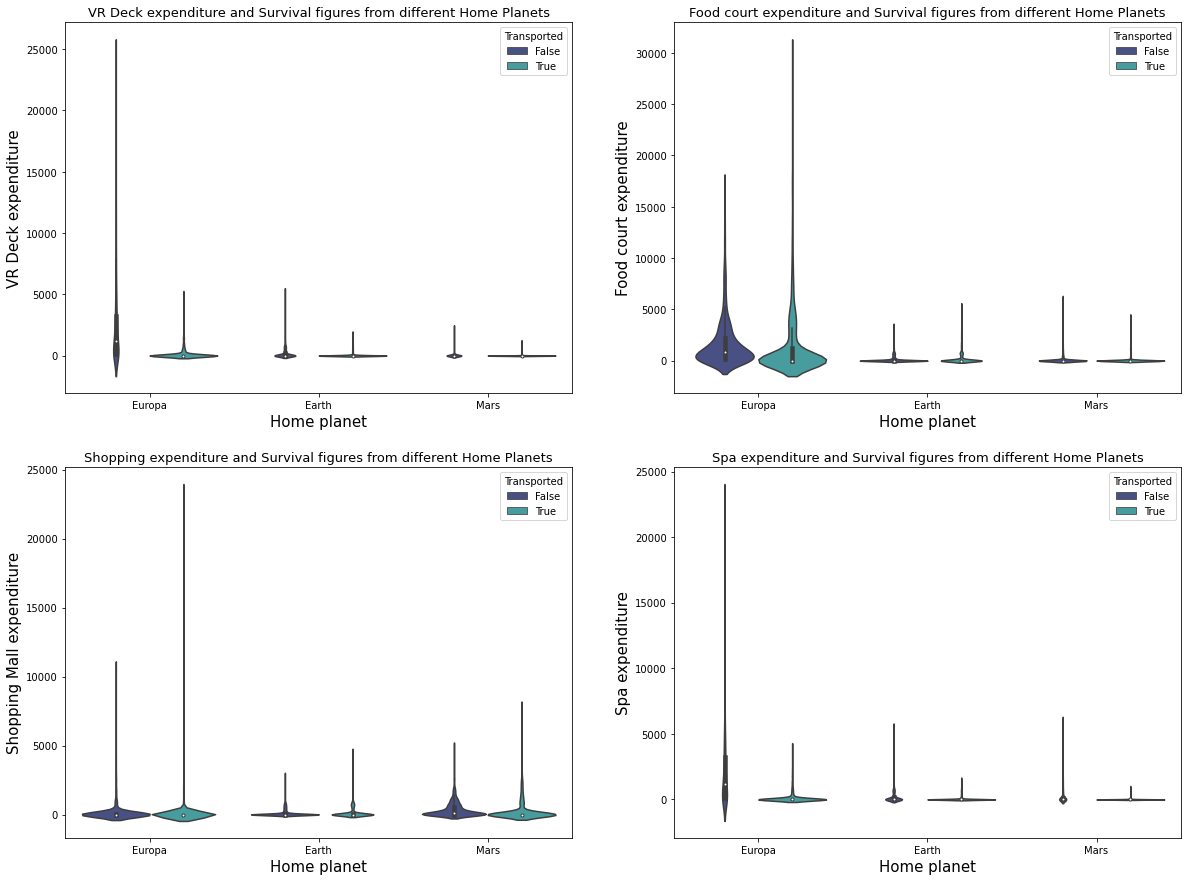

In [20]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.violinplot(x = HomePlanet, y = train_df.VRDeck, hue= train_df.Transported, palette='mako')
plt.title('VR Deck expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('VR Deck expenditure', fontsize=15)

# People from Europa spent the most in VR Deck, enjoying and actually enjoying a virtual world. 

plt.subplot(2,2,2)
sns.violinplot(x = HomePlanet, y = train_df.FoodCourt, hue= train_df.Transported, palette='mako')
plt.title('Food court expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Food court expenditure', fontsize=15)
# So, the plot suggests that, people from Europa had more propensity to spend on Food court 

plt.subplot(2,2,3)
sns.violinplot(x = HomePlanet, y = train_df.ShoppingMall, hue= train_df.Transported, palette='mako')
plt.title('Shopping expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Shopping Mall expenditure', fontsize=15)
# People from Mars should have spent more time in shopping mall and people from Europa may have spent a little more time in shopping mall

plt.subplot(2,2,4)
sns.violinplot(x = HomePlanet, y = train_df.Spa, hue= train_df.Transported, palette='mako')
plt.title('Spa expenditure and Survival figures from different Home Planets', fontsize=13)
plt.xlabel('Home planet', fontsize=15)
plt.ylabel('Spa expenditure', fontsize=15)
# There's not much pattern in spa spending and survival figures

# CryoSleep

#### Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [21]:
Cryosleep = train_df.CryoSleep

In [22]:
round(Cryosleep.isnull().sum()/len(Cryosleep)*100,2)

2.5

#### 2.5% data is missing or 217 values out of 8693

In [23]:
Cryosleep.describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

In [24]:
Cryosleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

Text(0.5, 1.0, 'Distribution of passengers in Cryosleep')

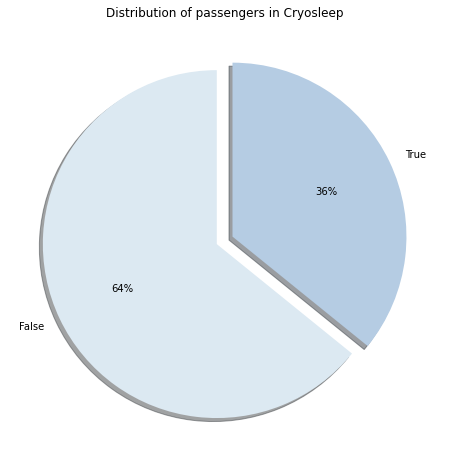

In [25]:
plt.figure(figsize=(12,8))
colors = sns.color_palette('BuPu')
explode = (0.05,)*len(Cryosleep.value_counts().values)
plt.pie(x = Cryosleep.value_counts().values, labels=Cryosleep.value_counts().index, 
        colors=colors,explode=explode, startangle=90, shadow=True, autopct='%.0f%%')
plt.title('Distribution of passengers in Cryosleep')

In [26]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Text(0, 0.5, 'Room service expenditure')

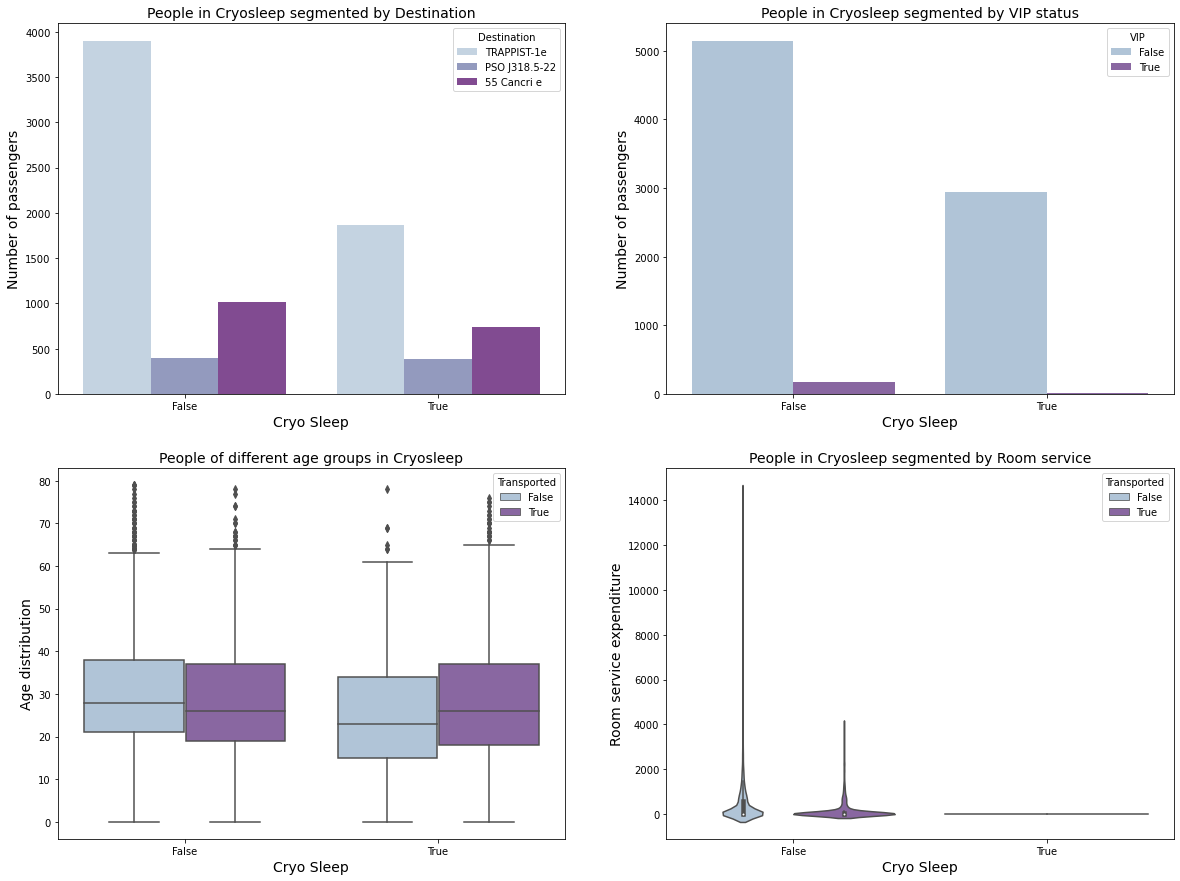

In [27]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.countplot(x = Cryosleep, hue= train_df.Destination, palette='BuPu')
plt.title('People in Cryosleep segmented by Destination', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Number of passengers', fontsize=14)

plt.subplot(2,2,2)
sns.countplot(x=Cryosleep, hue=train_df.VIP, palette= 'BuPu')
plt.title('People in Cryosleep segmented by VIP status', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Number of passengers', fontsize=14)

plt.subplot(2,2,3)
sns.boxplot(x=Cryosleep, y = train_df.Age,hue=train_df.Transported, palette= 'BuPu')
plt.title('People of different age groups in Cryosleep', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Age distribution', fontsize=14)

plt.subplot(2,2,4)
sns.violinplot(x=Cryosleep, y = train_df.RoomService,hue=train_df.Transported, palette= 'BuPu').set(title='People in Cryosleep and room service expenditure')
plt.title('People in Cryosleep segmented by Room service', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Room service expenditure', fontsize=14)

Text(0, 0.5, 'Spa expenditure')

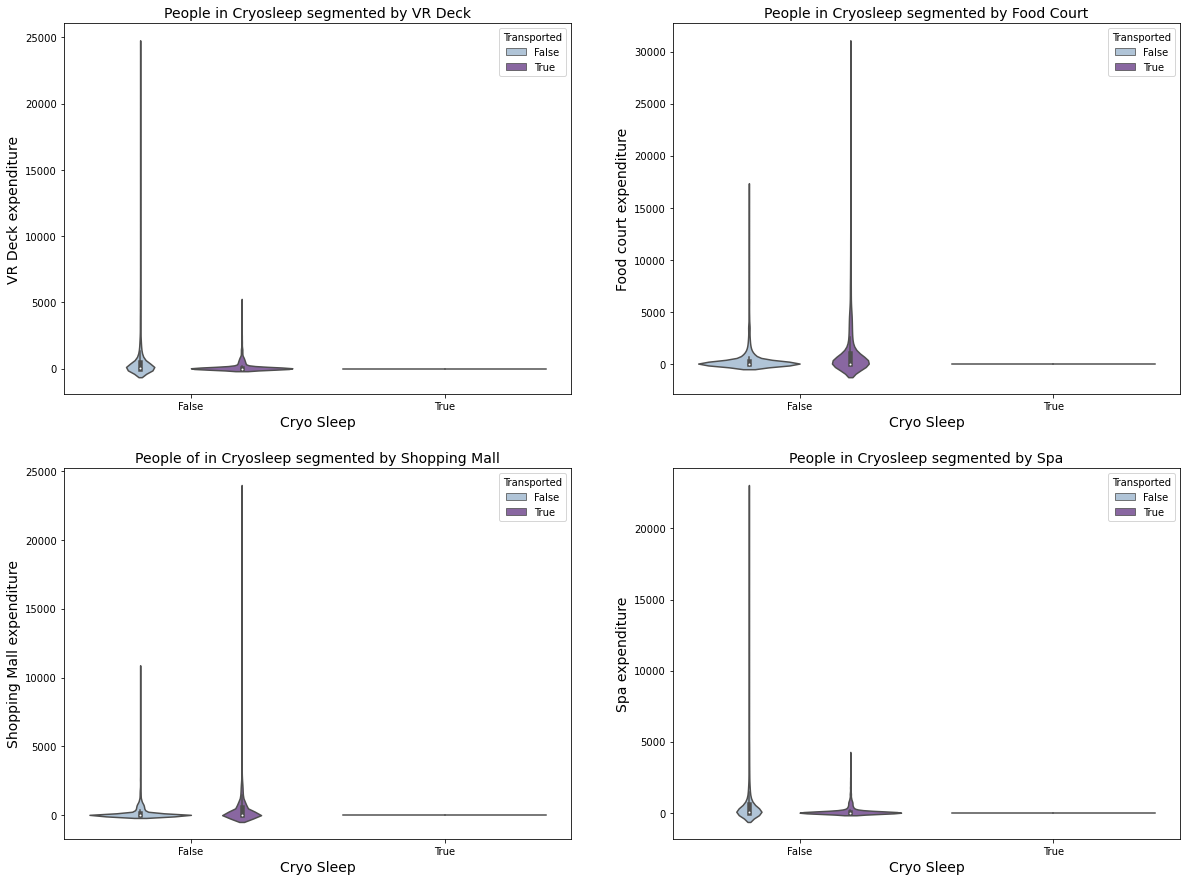

In [28]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.violinplot(x = Cryosleep, y= train_df.VRDeck, hue= train_df.Transported, palette='BuPu')
plt.title('People in Cryosleep segmented by VR Deck', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('VR Deck expenditure', fontsize=14)

plt.subplot(2,2,2)
sns.violinplot(x = Cryosleep, y= train_df.FoodCourt, hue= train_df.Transported, palette='BuPu')
plt.title('People in Cryosleep segmented by Food Court', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Food court expenditure', fontsize=14)

plt.subplot(2,2,3)
sns.violinplot(x=Cryosleep, y = train_df.ShoppingMall,hue=train_df.Transported, palette= 'BuPu')
plt.title('People of in Cryosleep segmented by Shopping Mall', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Shopping Mall expenditure', fontsize=14)

plt.subplot(2,2,4)
sns.violinplot(x=Cryosleep, y = train_df.Spa,hue=train_df.Transported, palette= 'BuPu')
plt.title('People in Cryosleep segmented by Spa', fontsize= 14)
plt.xlabel('Cryo Sleep', fontsize= 14)
plt.ylabel('Spa expenditure', fontsize=14)

##### As expected, people who are in cryosleep are confined to their cabin and are not involved in liesure activities 

# Cabin

#### The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [29]:
Cabin = train_df.Cabin

In [30]:
print(f'{round(Cabin.isnull().sum()/len(Cabin)*100,2)}% data is missing or {Cabin.isnull().sum()} values out of {len(Cabin)}')

2.29% data is missing or 199 values out of 8693


#### 2.29% data is missing or 199 values out of 8693

In [31]:
Cabin.describe() 
# There are a lot of different cabins in the spaceship and it is of type object 

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

In [32]:
# Let's break up the cabin into different segments to access more granular data and analyze it further. We can break it up into three different
# segments such as cabin_deck, cabin_nume, cabin_side

train_df['cabin_deck'] = train_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[0])
train_df['cabin_num'] = train_df.loc[:,'Cabin'].dropna().apply(lambda cabin: int(str(cabin).split('/')[1]))
train_df['cabin_side'] = train_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[2])
test_df['cabin_deck'] = test_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[0])
test_df['cabin_num'] = test_df.loc[:,'Cabin'].dropna().apply(lambda cabin: int(str(cabin).split('/')[1]))
test_df['cabin_side'] = test_df.loc[:,'Cabin'].dropna().apply(lambda cabin: str(cabin).split('/')[2])

In [33]:
# Now I think we can drop the cabin column and insert our new columns in that place
train_df.drop('Cabin',axis=1, inplace=True)
test_df.drop('Cabin',axis=1, inplace=True)

In [34]:
train_df.insert(3, 'cabin_Deck', train_df.cabin_deck)
train_df.insert(4, 'cabin_Num', train_df.cabin_num)
train_df.insert(5, 'cabin_Side', train_df.cabin_side)
train_df.drop(['cabin_num','cabin_deck','cabin_side'], axis=1, inplace=True)
test_df.insert(3, 'cabin_Deck', test_df.cabin_deck)
test_df.insert(4, 'cabin_Num', test_df.cabin_num)
test_df.insert(5, 'cabin_Side', test_df.cabin_side)
test_df.drop(['cabin_num','cabin_deck','cabin_side'], axis=1, inplace=True)

# Cabin Decks

Text(0.5, 1.0, 'Distribution of passengers in different cabin decks')

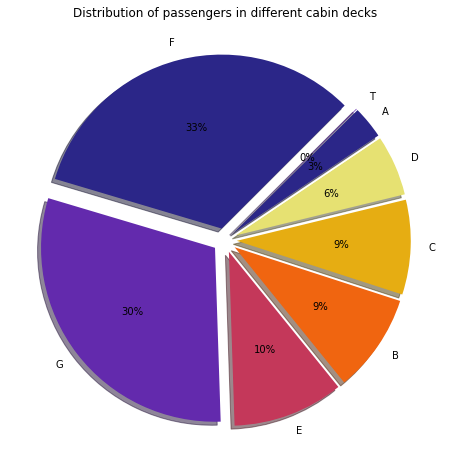

In [35]:
plt.figure(figsize=(12,8))
colors = sns.color_palette('CMRmap')
explode = (0.07,)*len(train_df.cabin_Deck.value_counts().values)
plt.pie(x = train_df.cabin_Deck.value_counts().values, labels=train_df.cabin_Deck.value_counts().index, 
        colors=colors, shadow=True, explode=explode, startangle=45,autopct='%.0f%%')
plt.title('Distribution of passengers in different cabin decks')

Text(0, 0.5, 'Number of passengers')

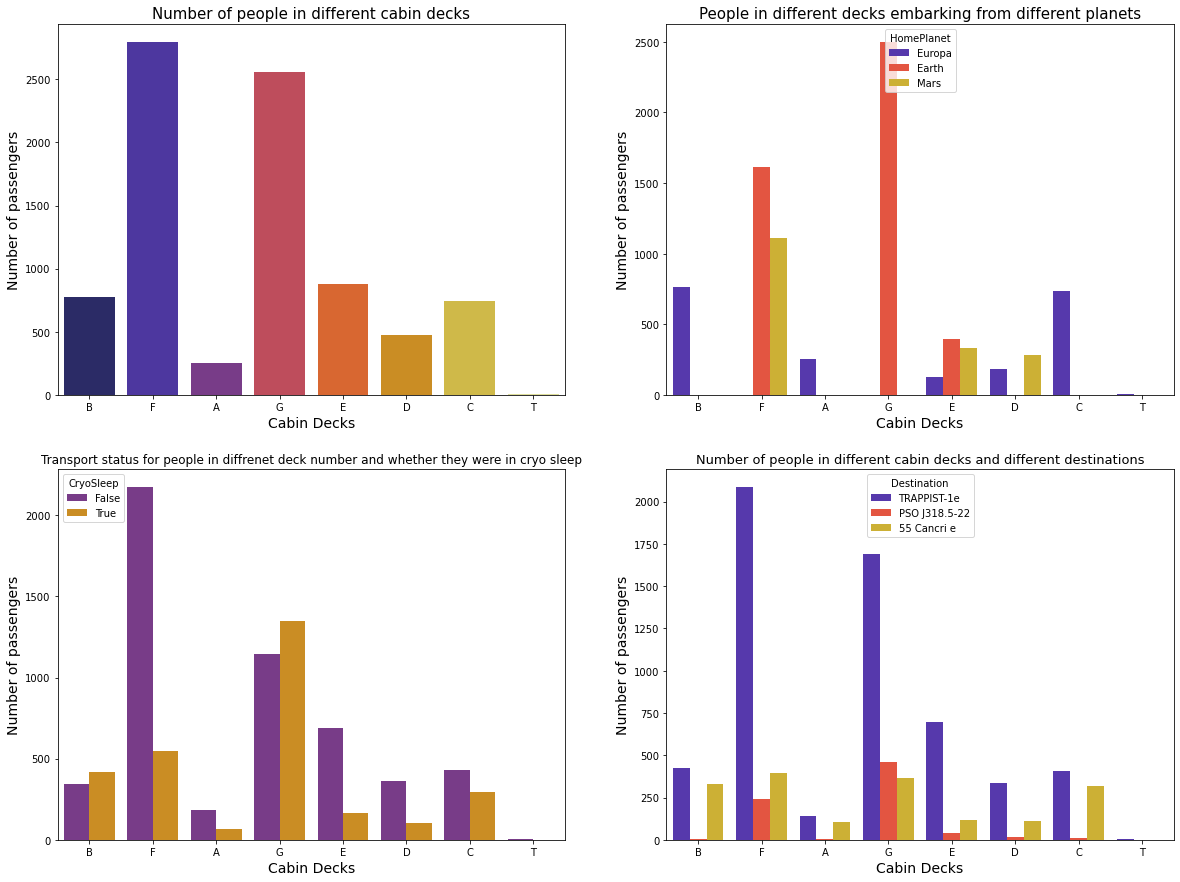

In [36]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.countplot(x=train_df.cabin_Deck, palette='CMRmap')
plt.title('Number of people in different cabin decks', fontsize=15)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)

plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Deck, hue=HomePlanet, palette='CMRmap')
plt.title('People in different decks embarking from different planets', fontsize=15)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)

plt.subplot(2,2,3)
sns.countplot(x=train_df.cabin_Deck, hue=Cryosleep, palette='CMRmap').set(title='Transport status for people in diffrenet deck number and whether they were in cryo sleep')
plt.title('Transport status for people in diffrenet deck number and whether they were in cryo sleep', fontsize=12)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)


plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Deck, hue=train_df.Destination, palette='CMRmap').set(title='Number of people in different cabin decks and different destinations')
plt.title('Number of people in different cabin decks and different destinations', fontsize=13)
plt.xlabel('Cabin Decks', fontsize=14)
plt.ylabel('Number of passengers', fontsize=14)

Text(0, 0.5, 'Room service expenditure')

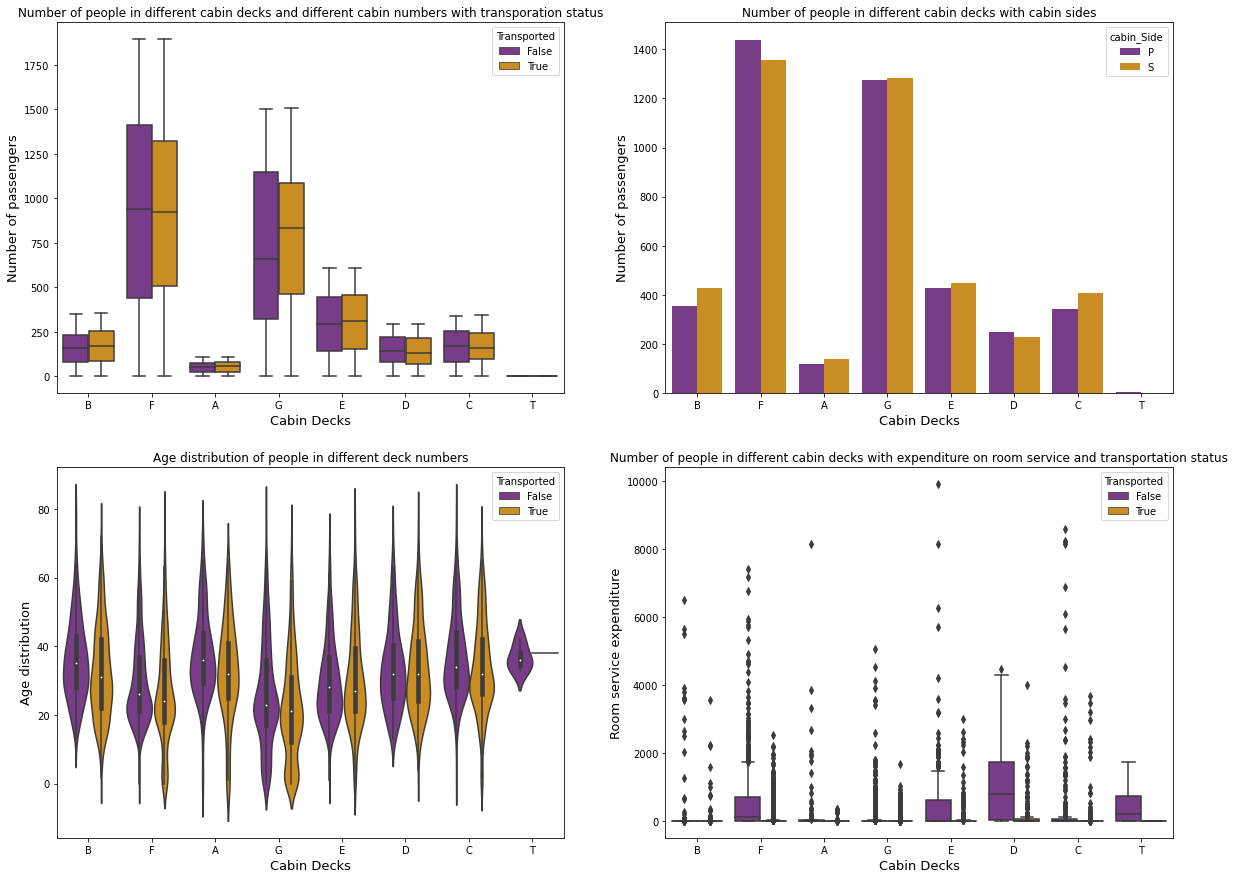

In [37]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Deck, y = train_df.cabin_Num, hue= train_df.Transported, palette='CMRmap').set(title='Number of people in different cabin decks and different cabin numbers with transporation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Number of passengers', fontsize =13)

plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Deck, hue= train_df.cabin_Side, palette='CMRmap').set(title='Number of people in different cabin decks with cabin sides')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Number of passengers', fontsize =13)

plt.subplot(2,2,3)
sns.violinplot(x=train_df.cabin_Deck, y = train_df.Age, hue=train_df.Transported, palette='CMRmap').set(title='Age distribution of people in different deck numbers')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Age distribution', fontsize =13)

plt.subplot(2,2,4)
sns.boxplot(x=train_df.cabin_Deck, y = train_df.RoomService, hue=train_df.Transported, palette='CMRmap').set(title='Number of people in different cabin decks with expenditure on room service and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Room service expenditure', fontsize =13)

Text(0, 0.5, 'Number of passengers')

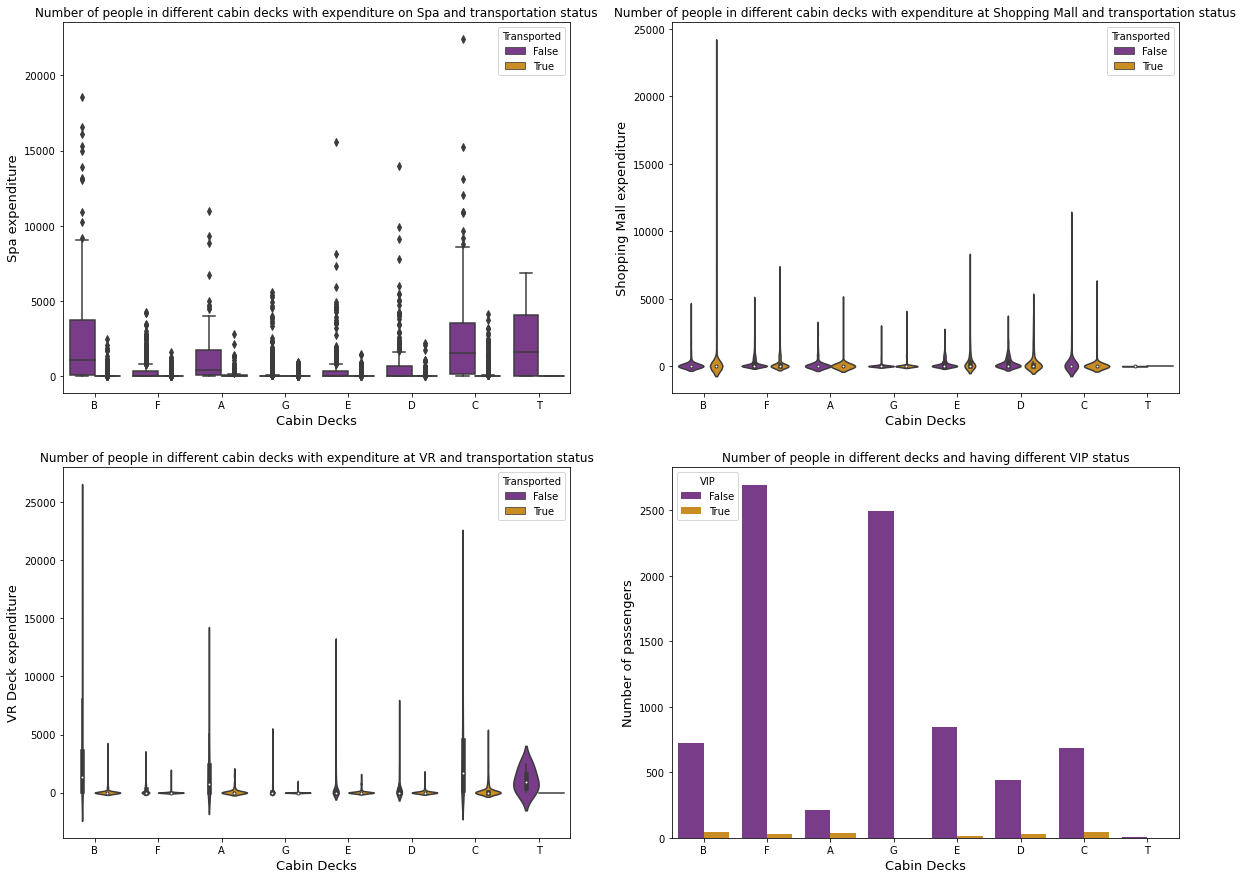

In [38]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Deck, y = train_df.Spa, hue= train_df.Transported, palette='CMRmap').set(title='Number of people in different cabin decks with expenditure on Spa and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Spa expenditure', fontsize =13)

plt.subplot(2,2,2)
sns.violinplot(x=train_df.cabin_Deck, y = train_df.ShoppingMall, hue=train_df.Transported, palette='CMRmap').set(title = 'Number of people in different cabin decks with expenditure at Shopping Mall and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Shopping Mall expenditure', fontsize =13)

plt.subplot(2,2,3)
sns.violinplot(x=train_df.cabin_Deck, y = train_df.VRDeck, hue=train_df.Transported, palette='CMRmap').set(title = 'Number of people in different cabin decks with expenditure at VR and transportation status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('VR Deck expenditure', fontsize =13)

plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Deck, hue=train_df.VIP, palette='CMRmap').set(title = 'Number of people in different decks and having different VIP status')
plt.xlabel('Cabin Decks', fontsize =13)
plt.ylabel('Number of passengers', fontsize =13)

# Cabin Sides

#### Either Port or Starboard side

In [39]:
round(train_df.cabin_Side.isnull().sum()/len(train_df.cabin_Side)*100,2)

2.29

### 2.29% data is missing or 199 values out of 8693

In [40]:
train_df.cabin_Side.value_counts()

S    4288
P    4206
Name: cabin_Side, dtype: int64

Text(0.5, 1.0, 'Distribution of passengers in different cabin sides')

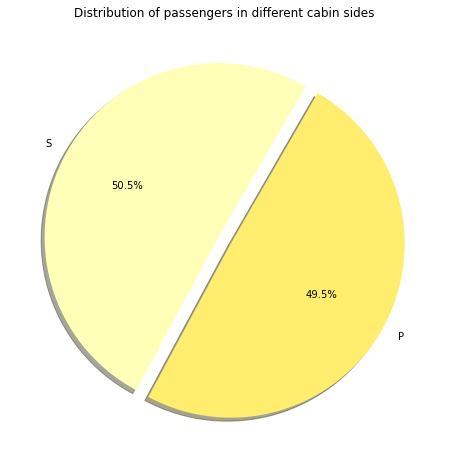

In [41]:
plt.figure(figsize=(12,8))
colors = sns.color_palette('afmhot_r')
explode = (0.04,)*len(train_df.cabin_Side.value_counts().values)
plt.pie(x = train_df.cabin_Side.value_counts().values, labels=train_df.cabin_Side.value_counts().index, 
        explode = explode, startangle=60,  colors=colors, shadow=True, autopct='%1.1f%%')
plt.title('Distribution of passengers in different cabin sides')

Text(0, 0.5, 'Number of Passengers')

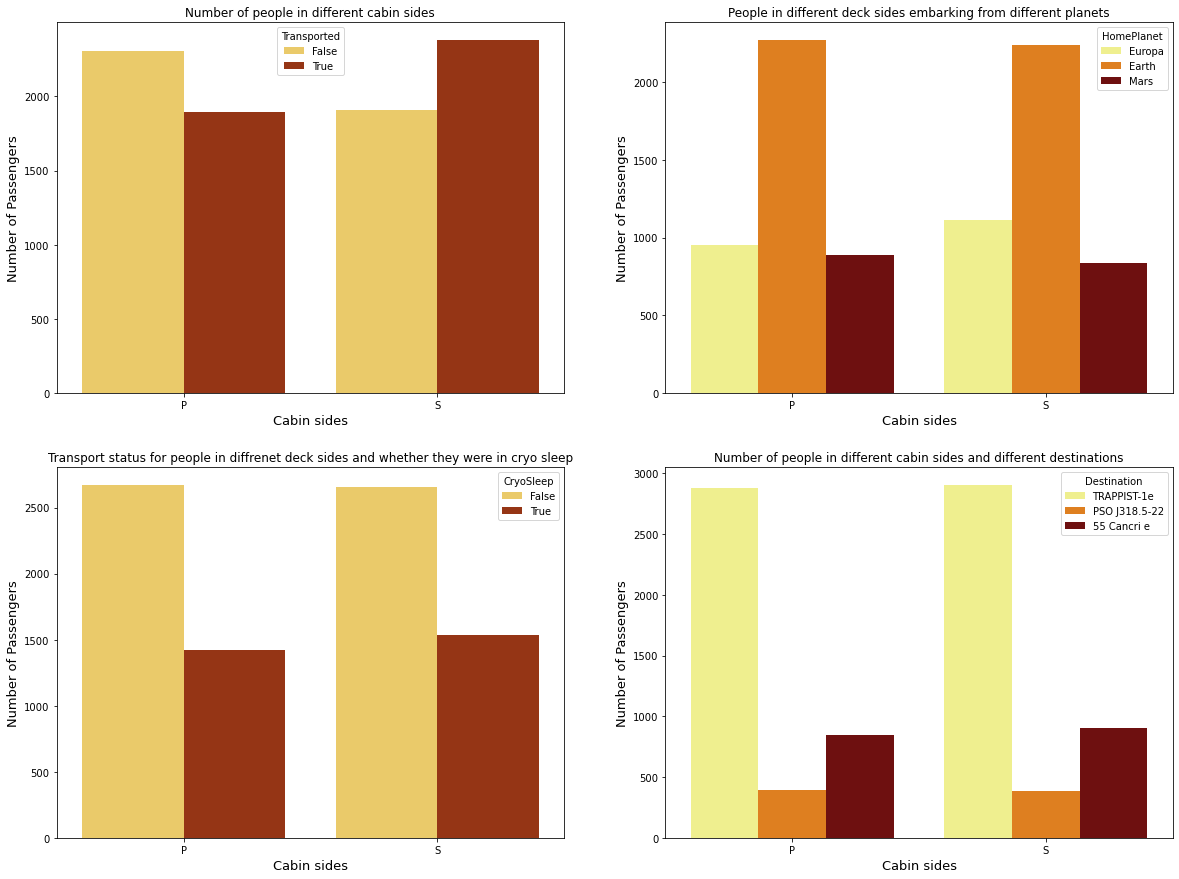

In [42]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.countplot(x=train_df.cabin_Side, hue = train_df.Transported, palette='afmhot_r').set(title='Number of people in different cabin sides')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)

plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Side, hue=HomePlanet, palette='afmhot_r').set(title='People in different deck sides embarking from different planets')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)

plt.subplot(2,2,3)
sns.countplot(x=train_df.cabin_Side, hue=Cryosleep, palette='afmhot_r').set(title='Transport status for people in diffrenet deck sides and whether they were in cryo sleep')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)

plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Side, hue=train_df.Destination, palette='afmhot_r').set(title='Number of people in different cabin sides and different destinations')
plt.xlabel('Cabin sides', fontsize =13)
plt.ylabel('Number of Passengers', fontsize =13)

Text(0, 0.5, 'Room Service expenditure')

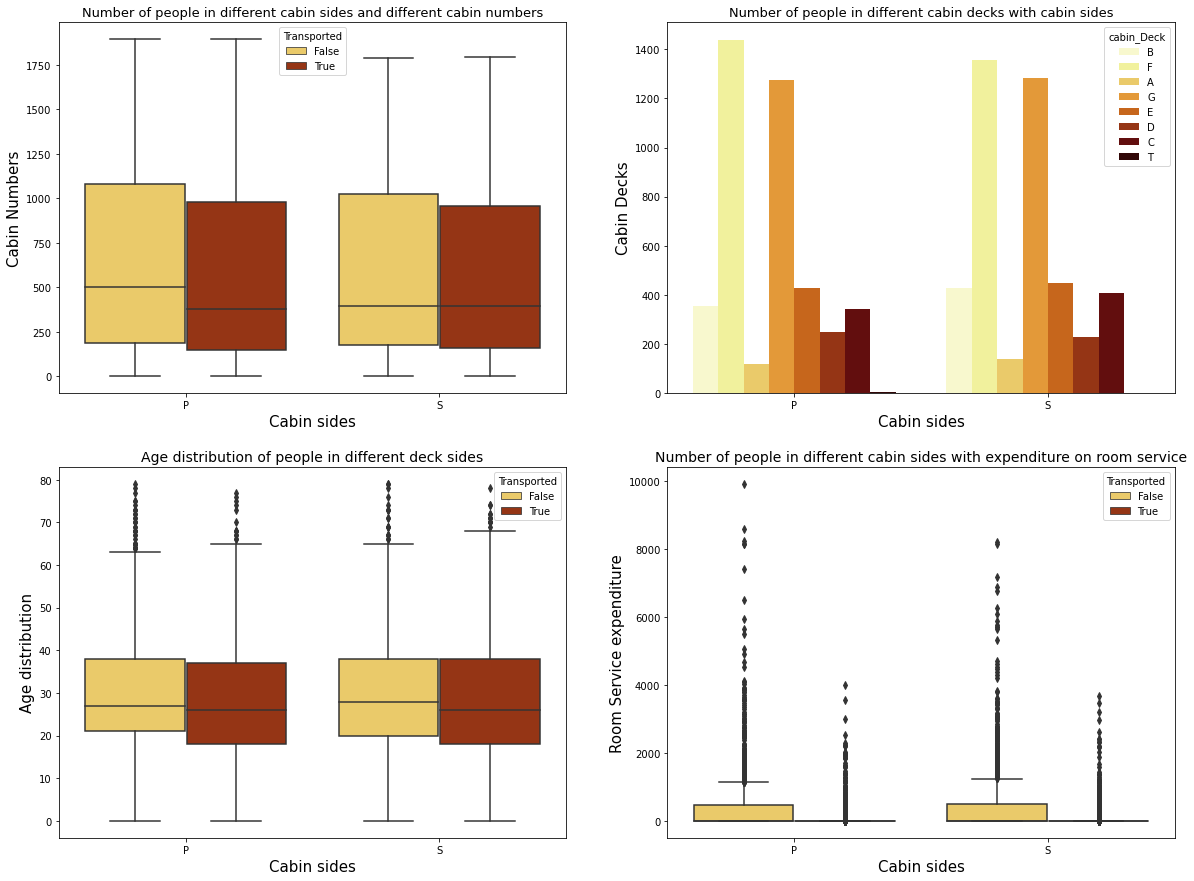

In [43]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Side, y = train_df.cabin_Num, hue= train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides and different cabin numbers', fontsize =13)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Cabin Numbers', fontsize =15)

plt.subplot(2,2,2)
sns.countplot(x=train_df.cabin_Side, hue= train_df.cabin_Deck, palette='afmhot_r')
plt.title('Number of people in different cabin decks with cabin sides', fontsize =13)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Cabin Decks', fontsize =15)

plt.subplot(2,2,3)
sns.boxplot(x=train_df.cabin_Side, y = train_df.Age, hue=train_df.Transported, palette='afmhot_r')
plt.title('Age distribution of people in different deck sides', fontsize =14)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Age distribution', fontsize =15)

plt.subplot(2,2,4)
sns.boxplot(x=train_df.cabin_Side, y = train_df.RoomService, hue=train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure on room service', fontsize =14)
plt.xlabel('Cabin sides', fontsize =15)
plt.ylabel('Room Service expenditure', fontsize =15)

Text(0, 0.5, 'VIP Status')

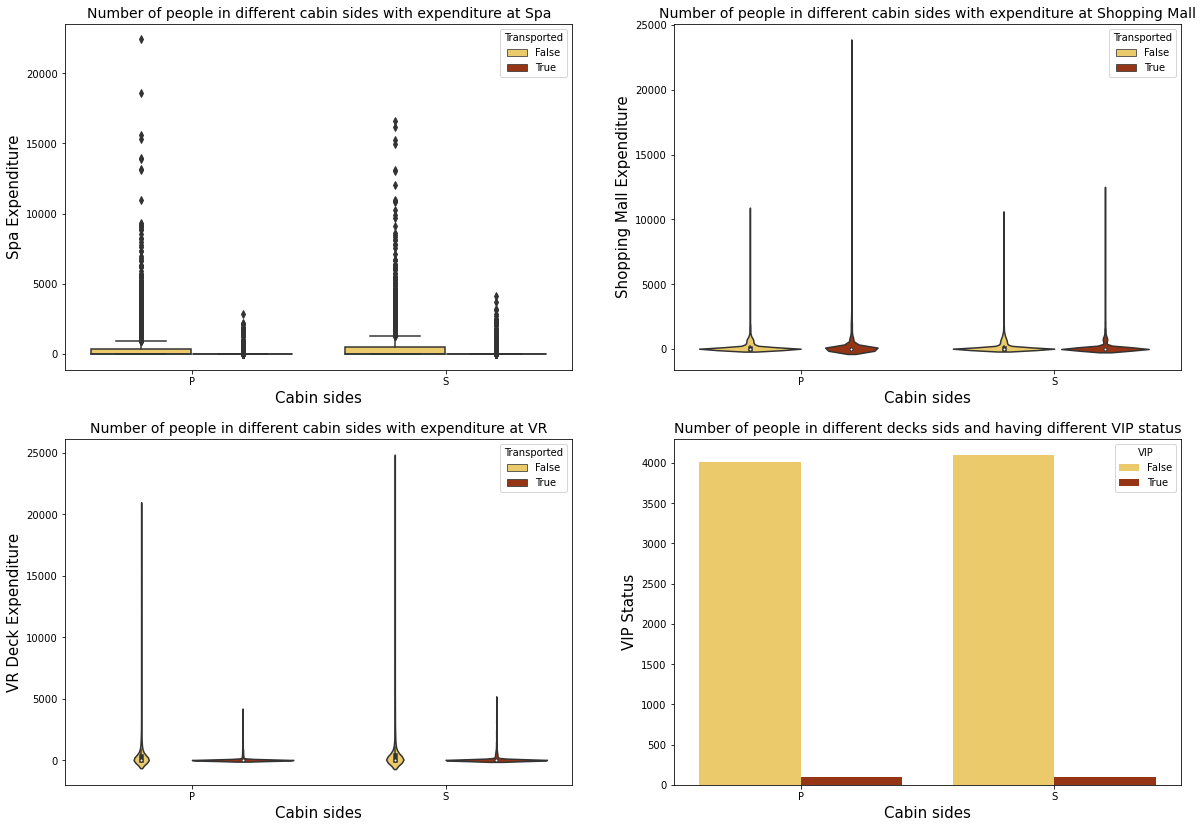

In [44]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.boxplot(x=train_df.cabin_Side, y = train_df.Spa, hue= train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure at Spa', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('Spa Expenditure', fontsize=15)

plt.subplot(2,2,2)
sns.violinplot(x=train_df.cabin_Side, y = train_df.ShoppingMall, hue=train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure at Shopping Mall', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('Shopping Mall Expenditure', fontsize=15)

plt.subplot(2,2,3)
sns.violinplot(x=train_df.cabin_Side, y = train_df.VRDeck, hue=train_df.Transported, palette='afmhot_r')
plt.title('Number of people in different cabin sides with expenditure at VR', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('VR Deck Expenditure', fontsize=15)


plt.subplot(2,2,4)
sns.countplot(x=train_df.cabin_Side, hue=train_df.VIP, palette='afmhot_r')
plt.title('Number of people in different decks sids and having different VIP status', fontsize =14)
plt.xlabel('Cabin sides', fontsize=15)
plt.ylabel('VIP Status', fontsize=15)

# Cabin Number

In [45]:
round(train_df.cabin_Num.isnull().sum()/len(train_df.cabin_Num)*100,2)

2.29

### 2.29% data is missing or 199 values out of 8693

In [46]:
train_df.cabin_Num.value_counts()

82.0      28
86.0      22
19.0      22
56.0      21
176.0     21
          ..
1644.0     1
1515.0     1
1639.0     1
1277.0     1
1894.0     1
Name: cabin_Num, Length: 1817, dtype: int64

Text(0, 0.5, 'Passenger count')

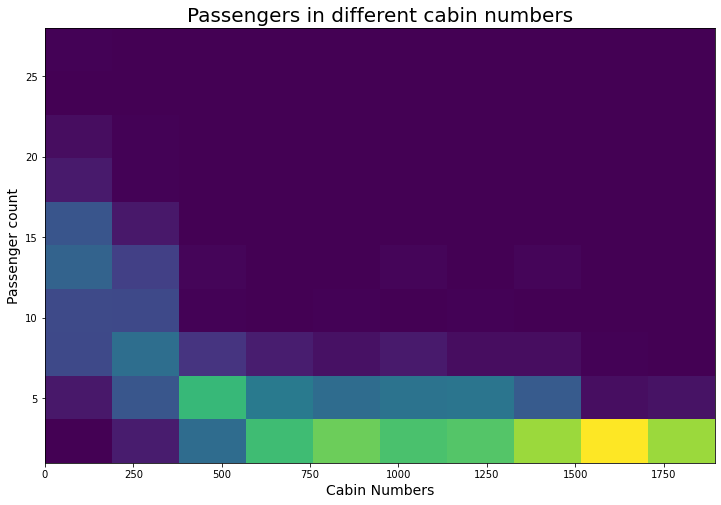

In [47]:
plt.figure(figsize=(12,8))
plt.hist2d(x = train_df.cabin_Num.value_counts().index.map(int), y = train_df.cabin_Num.value_counts().values)
plt.title('Passengers in different cabin numbers', fontsize = 20)
plt.xlabel('Cabin Numbers', fontsize = 14)
plt.ylabel('Passenger count', fontsize=14)

# As we see most of the passengers resided in deck numbers ranging from 50 to 500

In [48]:
train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 800)]['cabin_Deck']

4       F
6       F
8       F
9       B
10      B
       ..
8686    A
8687    A
8688    A
8691    E
8692    E
Name: cabin_Deck, Length: 5677, dtype: object

Text(0, 0.5, 'Number of Passengers')

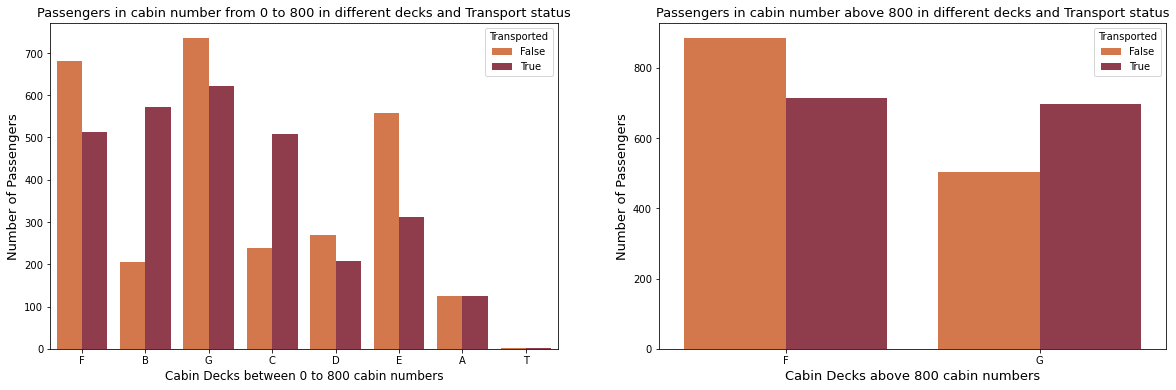

In [49]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x=train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 800)]['cabin_Deck'], hue=train_df.Transported, palette=sns.color_palette('icefire_r'))
plt.xlabel('Cabin Decks between 0 to 800 cabin numbers', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=13)
plt.title('Passengers in cabin number from 0 to 800 in different decks and Transport status', fontsize=13)

plt.subplot(1,2,2)
sns.countplot(x=train_df[train_df.cabin_Num > 800]['cabin_Deck'], hue=train_df.Transported,palette=sns.color_palette('icefire_r'))
plt.title('Passengers in cabin number above 800 in different decks and Transport status', fontsize=13)
plt.xlabel('Cabin Decks above 800 cabin numbers', fontsize=13)
plt.ylabel('Number of Passengers', fontsize=13)

Text(0, 0.5, 'Number of Passengers')

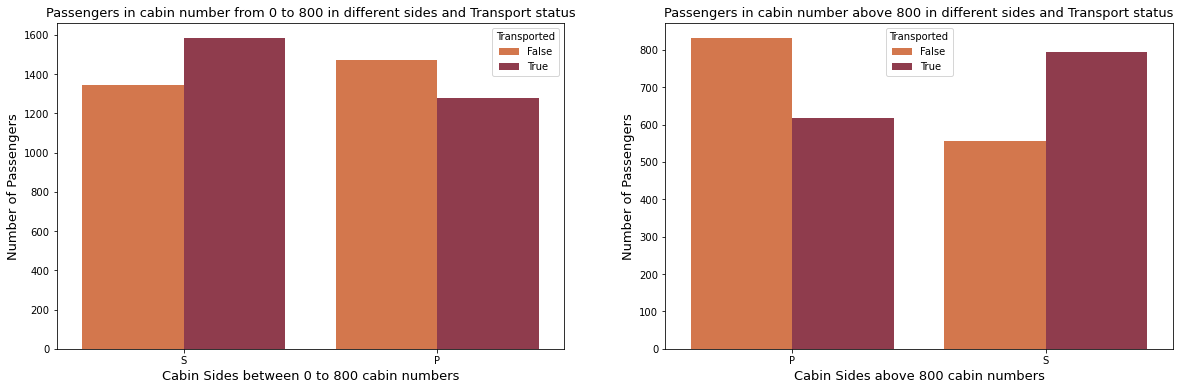

In [50]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x=train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 800)]['cabin_Side'], hue=train_df.Transported, palette=sns.color_palette('icefire_r'))
plt.xlabel('Cabin Sides between 0 to 800 cabin numbers', fontsize=13)
plt.title('Passengers in cabin number from 0 to 800 in different sides and Transport status', fontsize=13)
plt.ylabel('Number of Passengers', fontsize=13)


plt.subplot(1,2,2)
sns.countplot(x=train_df[train_df.cabin_Num > 800]['cabin_Side'], hue=train_df.Transported,palette=sns.color_palette('icefire_r'))
plt.title('Passengers in cabin number above 800 in different sides and Transport status', fontsize=13)
plt.xlabel('Cabin Sides above 800 cabin numbers', fontsize=13)
plt.ylabel('Number of Passengers', fontsize=13)

Text(0, 0.5, 'Number of Passengers')

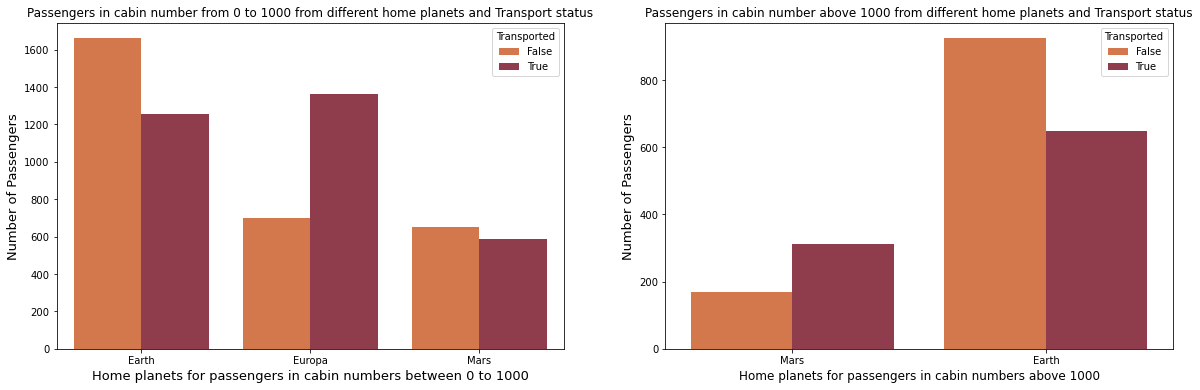

In [51]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x=train_df[(train_df.cabin_Num > 0) & (train_df.cabin_Num < 1000)]['HomePlanet'], hue=train_df.Transported, palette=sns.color_palette('icefire_r'))
plt.xlabel('Home planets for passengers in cabin numbers between 0 to 1000', fontsize=13)
plt.ylabel('Number of Passengers', fontsize=13)

plt.title('Passengers in cabin number from 0 to 1000 from different home planets and Transport status', fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x=train_df[train_df.cabin_Num > 1000]['HomePlanet'], hue=train_df.Transported,palette=sns.color_palette('icefire_r'))
plt.title('Passengers in cabin number above 1000 from different home planets and Transport status', fontsize=12)
plt.xlabel('Home planets for passengers in cabin numbers above 1000', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=13)

# Destination
### The planet the passenger will be debarking to.


In [52]:
destination = train_df.Destination

In [53]:
print(f'{round(destination.isnull().sum()/len(destination)*100,2)}% data is missing or {destination.isnull().sum()} values out of {len(destination)}')

2.09% data is missing or 182 values out of 8693


### 2.09% data is missing or 182 values out of 8693

In [54]:
destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

Text(0.5, 1.0, 'Chart showing number of passengers to different destinations')

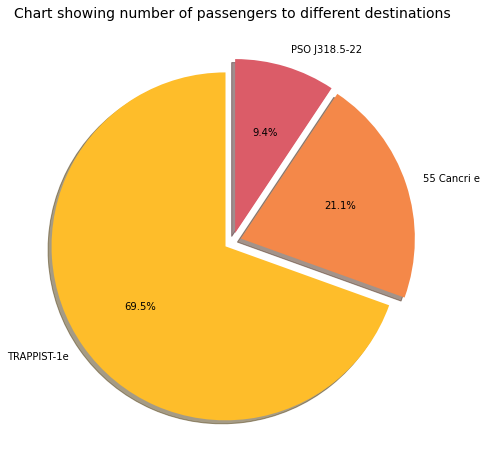

In [55]:
plt.figure(figsize=(12,8))
color = sns.color_palette('plasma_r')
explode = (0.05,)*len(destination.value_counts().values)
plt.pie(x = destination.value_counts().values, labels=destination.value_counts().index, autopct='%1.1f%%', 
        explode=explode, startangle=90, colors=color,shadow=True)
plt.title('Chart showing number of passengers to different destinations', fontsize = 14)

In [56]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,cabin_Deck,cabin_Num,cabin_Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Text(0, 0.5, 'Expenditure on Room Service')

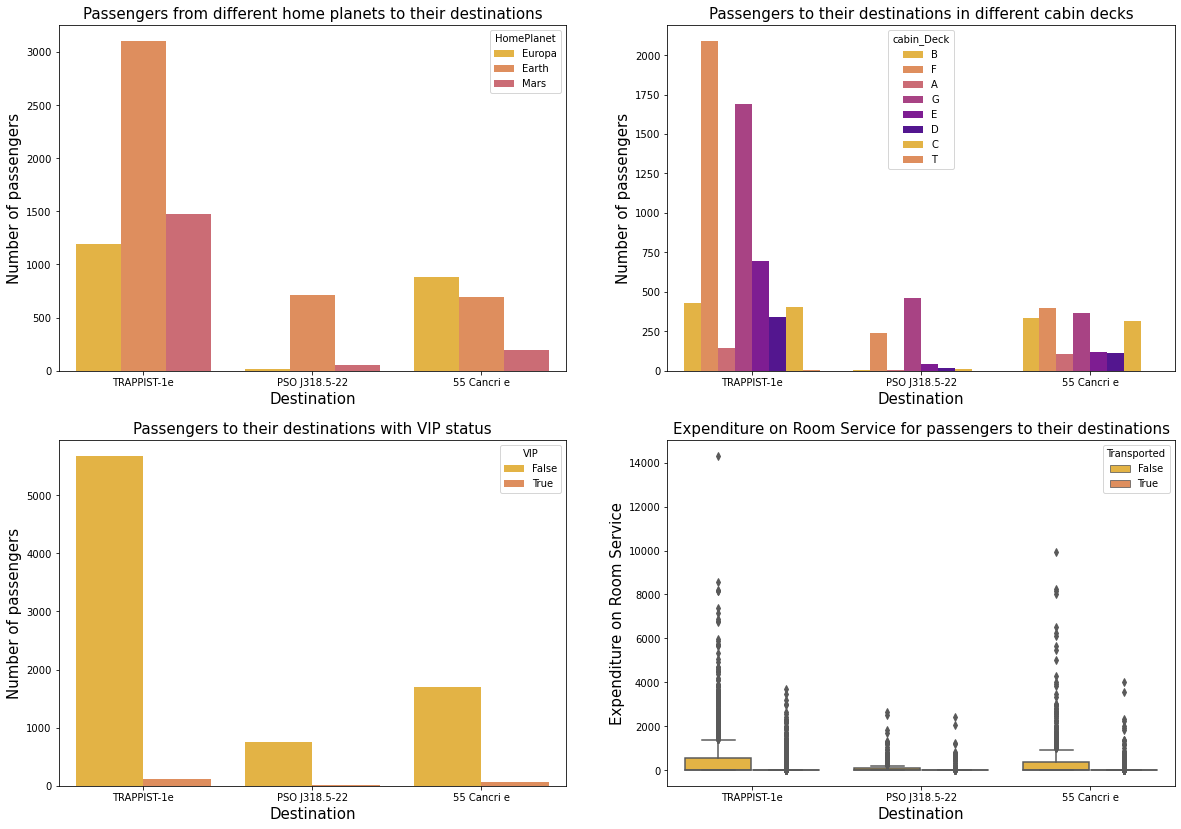

In [57]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.countplot(destination, hue=HomePlanet, palette=color)
plt.title('Passengers from different home planets to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)

plt.subplot(2,2,2)
sns.countplot(destination, hue=train_df.cabin_Deck, palette = color)
plt.title('Passengers to their destinations in different cabin decks', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)

plt.subplot(2,2,3)
sns.countplot(destination, hue=train_df.VIP ,palette = color)
plt.title('Passengers to their destinations with VIP status', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(x = destination, y=train_df.RoomService ,hue = train_df.Transported, palette = color)
plt.title('Expenditure on Room Service for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Expenditure on Room Service', fontsize=15)

Text(0, 0.5, 'Age')

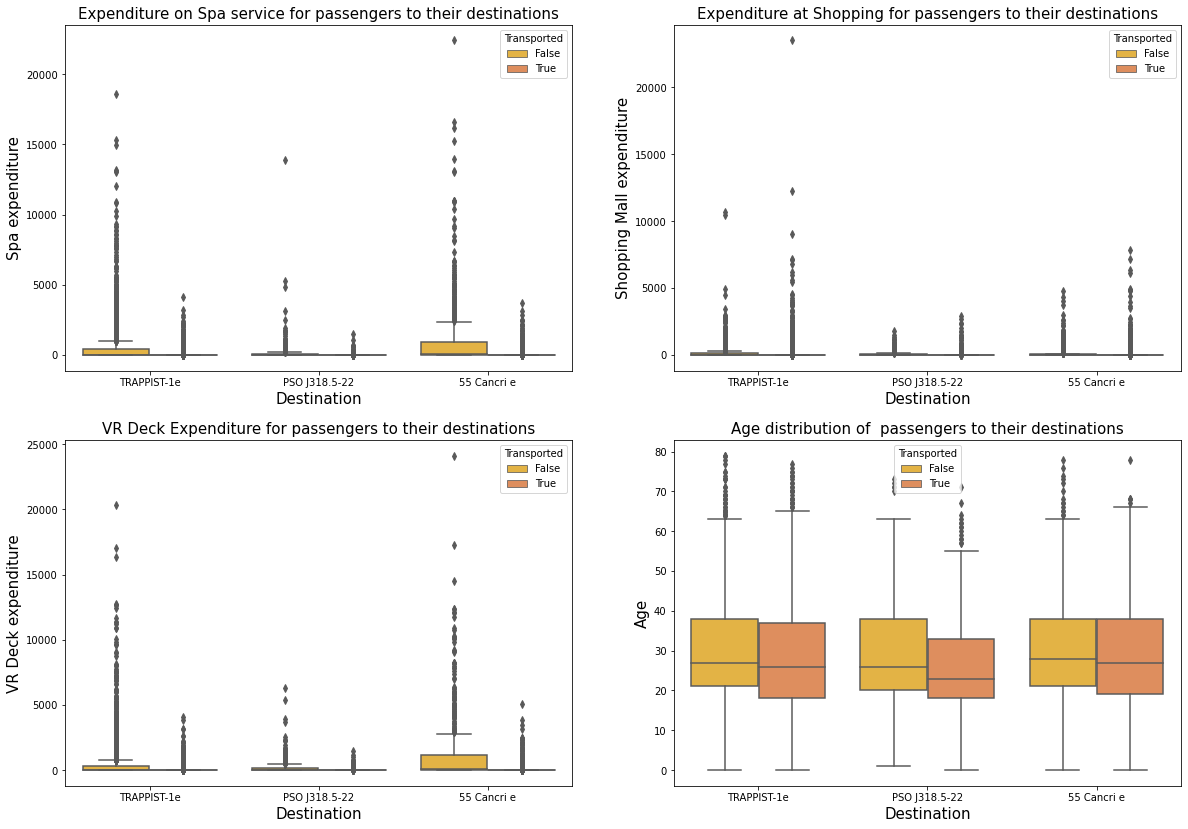

In [58]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.boxplot(x = destination, y=train_df.Spa ,hue = train_df.Transported, palette = color)
plt.title('Expenditure on Spa service for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Spa expenditure', fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x = destination, y=train_df.ShoppingMall ,hue = train_df.Transported, palette = color)
plt.title('Expenditure at Shopping for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Shopping Mall expenditure', fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(x = destination, y=train_df.VRDeck ,hue = train_df.Transported, palette = color)
plt.title('VR Deck Expenditure for passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('VR Deck expenditure', fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(x = destination, y=train_df.Age ,hue = train_df.Transported, palette = color)
plt.title('Age distribution of  passengers to their destinations', fontsize = 15)
plt.xlabel('Destination', fontsize=15)
plt.ylabel('Age', fontsize=15)

# Age
### The age of the passenger.

In [59]:
age = train_df.Age

In [60]:
print(f'{round(age.isnull().sum()/len(age)*100,2)}% data is missing or {age.isnull().sum()} values out of {len(age)}')

2.06% data is missing or 179 values out of 8693


### 2.06% data is missing or 179 values out of 8693

Text(0, 0.5, 'Number of Passengers')

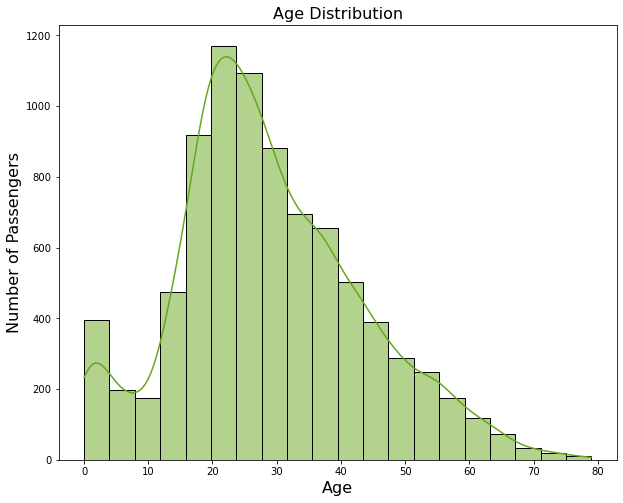

In [61]:
plt.figure(figsize=(10,8))
sns.histplot(age, bins=20 , color=sns.color_palette('Dark2_r')[2],kde=True)
plt.title('Age Distribution', fontsize = 16)
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Number of Passengers', fontsize = 16)

In [62]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,cabin_Deck,cabin_Num,cabin_Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Text(0, 0.5, 'VR Deck Expenditure')

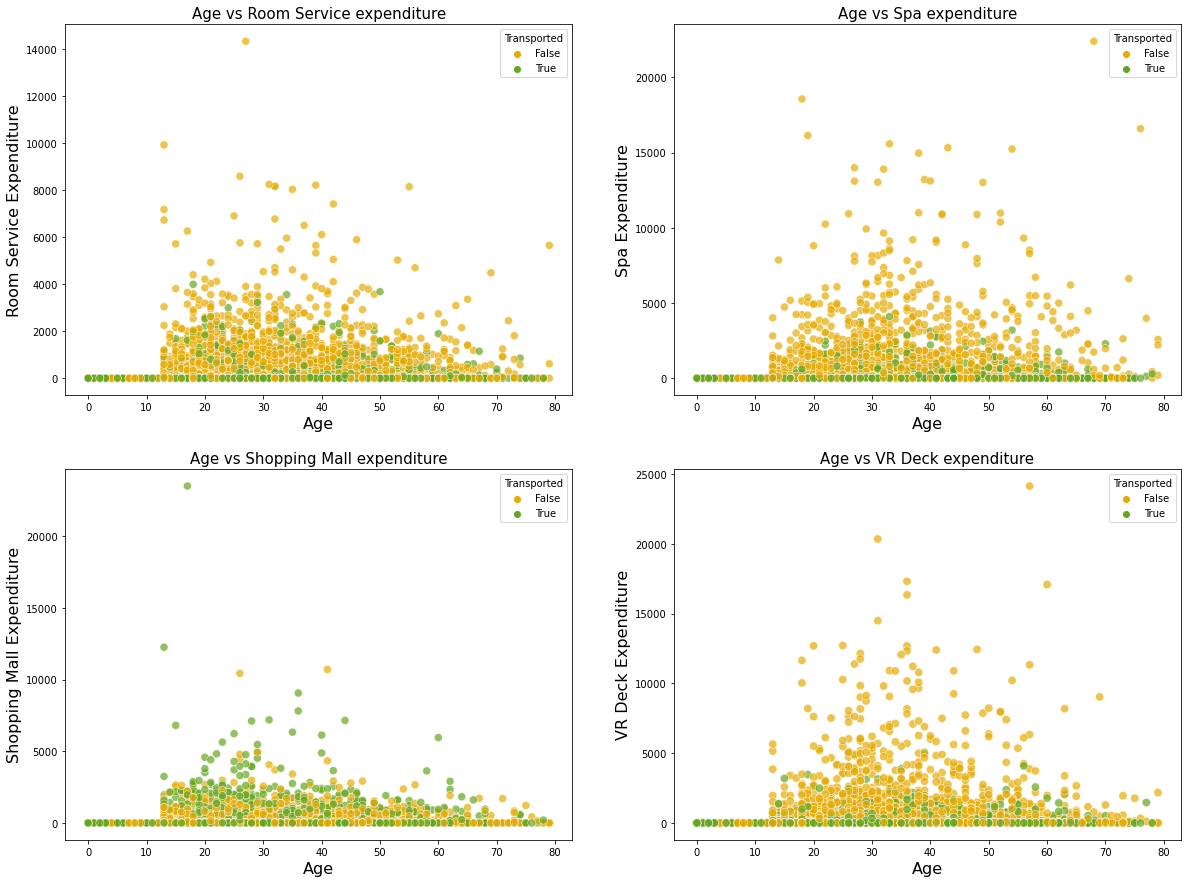

In [63]:
plt.figure(figsize=(20,15))
color=sns.color_palette('Dark2_r')

plt.subplot(2,2,1)
sns.scatterplot(x = age, y = train_df.RoomService, hue=train_df.Transported, palette=color[1:3], s=65, alpha = 0.7)
plt.title('Age vs Room Service expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Room Service Expenditure', fontsize = 16)

plt.subplot(2,2,2)
sns.scatterplot(x = age, y = train_df.Spa, hue=train_df.Transported, palette=color[1:3], s=65, alpha = 0.7)
plt.title('Age vs Spa expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)

plt.subplot(2,2,3)
sns.scatterplot(x = age, y = train_df.ShoppingMall, hue=train_df.Transported, palette=color[1:3], s=65, alpha = 0.7)
plt.title('Age vs Shopping Mall expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Shopping Mall Expenditure', fontsize = 16)

plt.subplot(2,2,4)
sns.scatterplot(x = age, y = train_df.VRDeck, hue=train_df.Transported, palette=color[1:3], s=70, alpha = 0.7)
plt.title('Age vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Age', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)

# VIP
### Whether the passenger has paid for special VIP service during the voyage.

In [64]:
vip = train_df.VIP

In [65]:
print(f'{round(vip.isnull().sum()/len(vip)*100,2)}% data is missing or {vip.isnull().sum()} values out of {len(vip)}')

2.34% data is missing or 203 values out of 8693


### 2.34% data is missing or 203 values out of 8693

Text(0.5, 1.0, 'Chart showing VIP status of passengers')

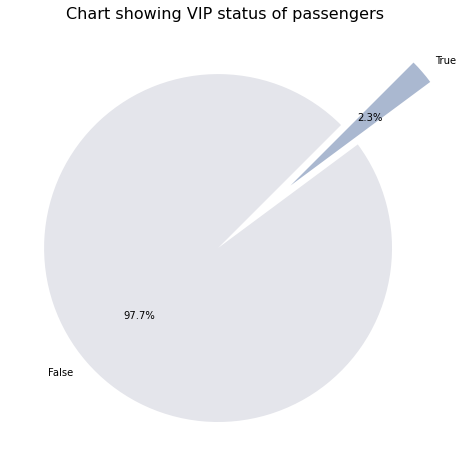

In [66]:
plt.figure(figsize=(12,8))
explode = (0.05, 0.5)
plt.pie(x = vip.value_counts().values, labels=vip.value_counts().index, autopct='%1.1f%%', 
        explode=explode, startangle=45, colors=sns.color_palette('vlag_r')[3:5])
plt.title('Chart showing VIP status of passengers', fontsize=16)

In [67]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,cabin_Deck,cabin_Num,cabin_Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Text(0, 0.5, 'Shopping Mall expenditure')

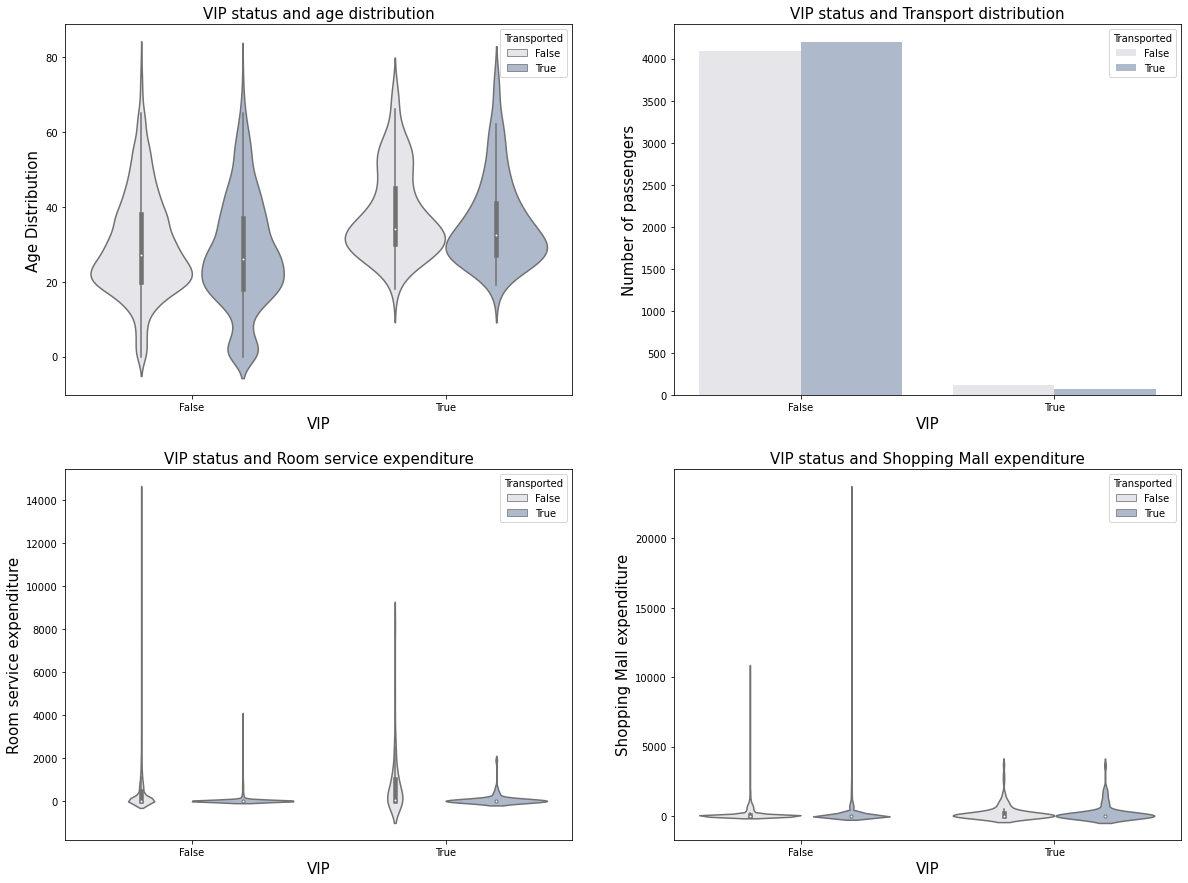

In [68]:
plt.figure(figsize=(20,15))
palette = sns.color_palette('vlag_r')[3:6]

plt.subplot(2,2,1)
sns.violinplot(x = vip,y = age, hue=train_df.Transported, palette=palette)
plt.title('VIP status and age distribution', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Age Distribution', fontsize=15)

plt.subplot(2,2,2)
sns.countplot(x = vip, hue=train_df.Transported, palette=palette)
plt.title('VIP status and Transport distribution', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Number of passengers', fontsize=15)

plt.subplot(2,2,3)
sns.violinplot(x = vip, y = train_df.RoomService, hue = train_df.Transported, palette=palette)
plt.title('VIP status and Room service expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Room service expenditure', fontsize=15)


plt.subplot(2,2,4)
sns.violinplot(x = vip, y = train_df.ShoppingMall, hue = train_df.Transported, palette=palette)
plt.title('VIP status and Shopping Mall expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Shopping Mall expenditure', fontsize=15)


In [69]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,cabin_Deck,cabin_Num,cabin_Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Text(0, 0.5, 'Spa Expenditure')

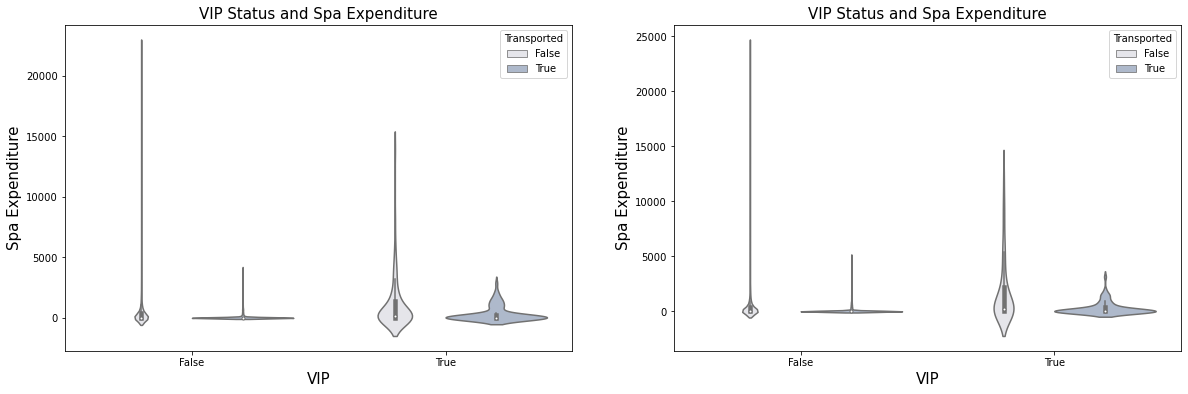

In [70]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
sns.violinplot(x = vip, y = train_df.Spa, hue=train_df.Transported, palette=palette)
plt.title('VIP Status and Spa Expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Spa Expenditure', fontsize=15)

plt.subplot(1,2,2)
sns.violinplot(x = vip, y = train_df.VRDeck, hue = train_df.Transported, palette=palette)
plt.title('VIP Status and Spa Expenditure', fontsize = 15)
plt.xlabel('VIP', fontsize=15)
plt.ylabel('Spa Expenditure', fontsize=15)

# Room Service
### Amount the passenger has billed at Room Service of the Spaceship Titanic.

In [71]:
roomservice = train_df.RoomService

In [72]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,cabin_Deck,cabin_Num,cabin_Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [73]:
print(f'{round(roomservice.isnull().sum()/len(roomservice)*100,2)}% data is missing or {roomservice.isnull().sum()} values out of {len(roomservice)}')

2.08% data is missing or 181 values out of 8693


### 2.08% data is missing or 181 values out of 8693

Text(0, 0.5, 'Number of passengers')

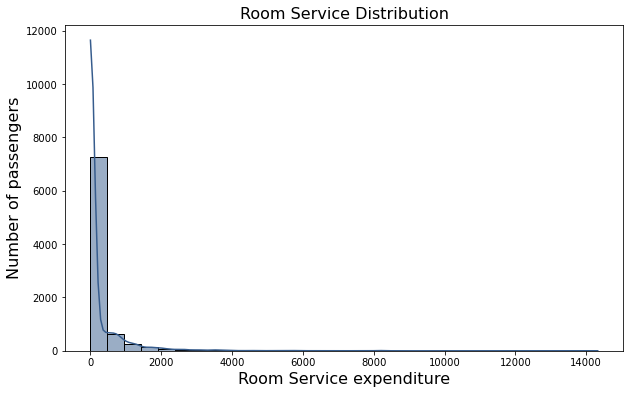

In [74]:
plt.figure(figsize=(10,6))
palette = sns.color_palette('viridis_r')
sns.histplot(x = roomservice, bins=30, color=sns.color_palette('viridis_r')[4], kde=True)
plt.title('Room Service Distribution', fontsize = 16)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize=16)

Text(0, 0.5, 'VR Deck Expenditure')

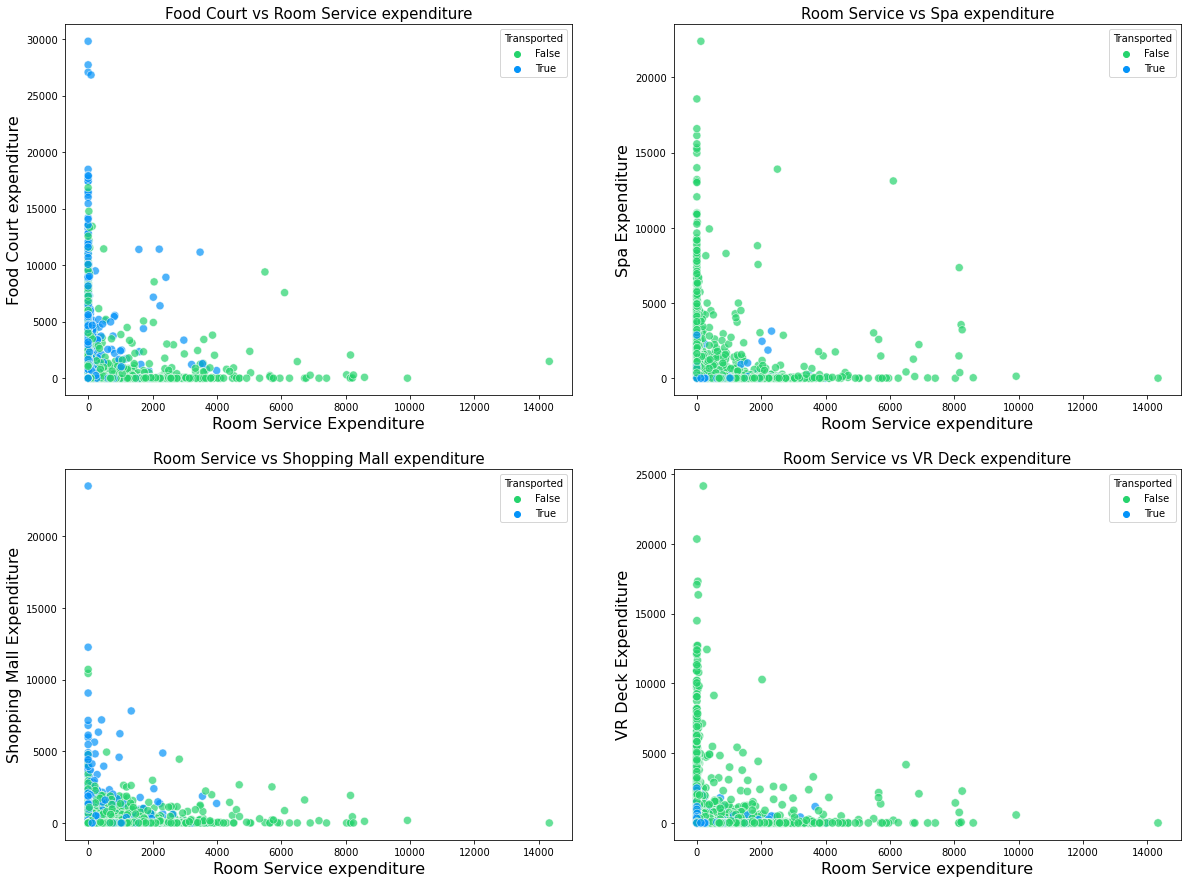

In [75]:
plt.figure(figsize=(20,15))
color=sns.color_palette('terrain_r')

plt.subplot(2,2,1)
sns.scatterplot(x = roomservice, y = train_df.FoodCourt, hue=train_df.Transported, palette=color[4:], s=65, alpha = 0.7)
plt.title('Food Court vs Room Service expenditure', fontsize = 15)
plt.xlabel('Room Service Expenditure', fontsize=16)
plt.ylabel('Food Court expenditure', fontsize = 16)

plt.subplot(2,2,2)
sns.scatterplot(x = roomservice, y = train_df.Spa, hue=train_df.Transported, palette=color[4:], s=65, alpha = 0.7)
plt.title('Room Service vs Spa expenditure', fontsize = 15)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)

plt.subplot(2,2,3)
sns.scatterplot(x = roomservice, y = train_df.ShoppingMall, hue=train_df.Transported, palette=color[4:], s=65, alpha = 0.7)
plt.title('Room Service vs Shopping Mall expenditure', fontsize = 15)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('Shopping Mall Expenditure', fontsize = 16)

plt.subplot(2,2,4)
sns.scatterplot(x = roomservice, y = train_df.VRDeck, hue=train_df.Transported, palette=color[4:], s=70, alpha = 0.7)
plt.title('Room Service vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Room Service expenditure', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)

# Food Court
### Amount the passenger has billed at Food Court of the Spaceship Titanic.


In [76]:
foodcourt = train_df.FoodCourt

In [77]:
print(f'{round(train_df.FoodCourt.isnull().sum()/len(train_df.FoodCourt)*100,2)}% data is missing or {train_df.FoodCourt.isnull().sum()} values out of {len(train_df.FoodCourt)}')

2.11% data is missing or 183 values out of 8693


### 2.11% data is missing or 183 values out of 8693

Text(0, 0.5, 'VR Deck Expenditure')

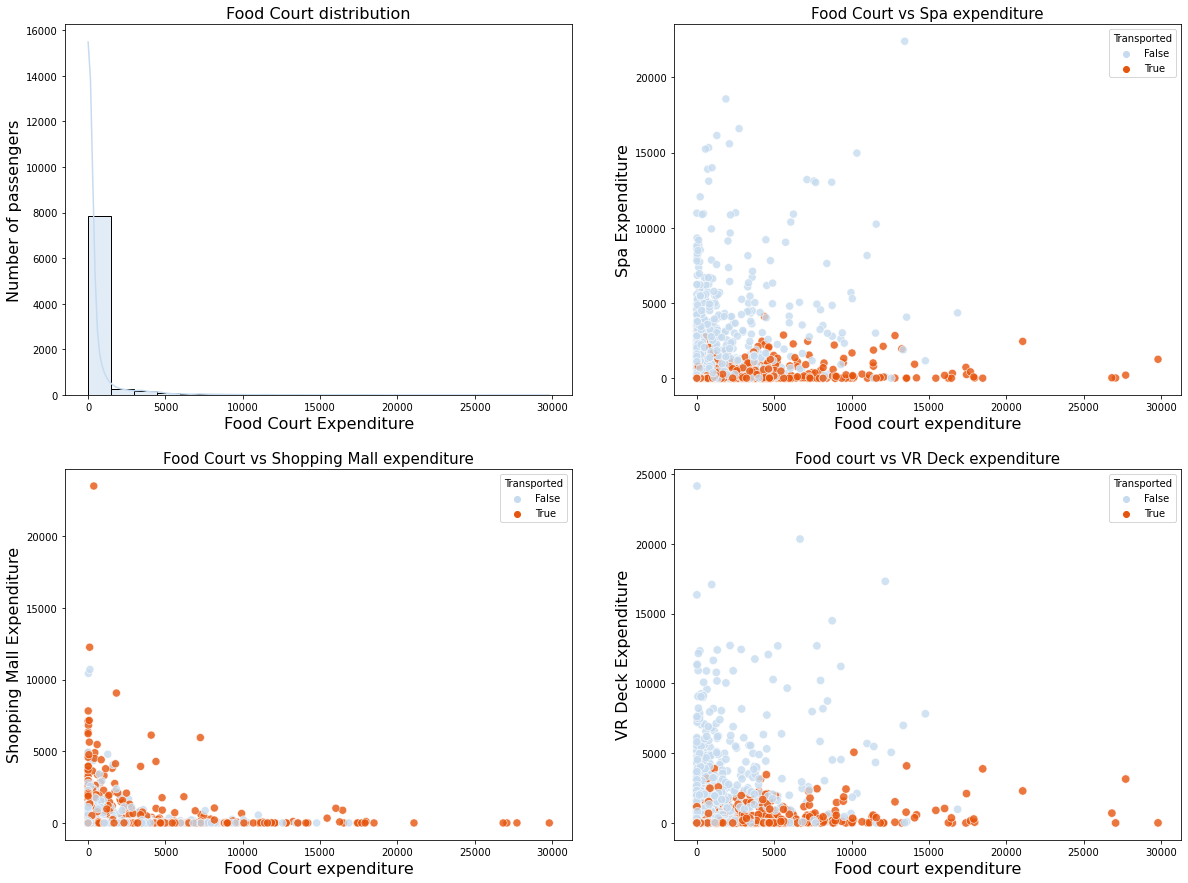

In [78]:
plt.figure(figsize=(20,15))
color=sns.color_palette('tab20c')

plt.subplot(2,2,1)
sns.histplot(x = foodcourt, bins = 20, color=color[3],kde=True)
plt.title('Food Court distribution', fontsize = 16)
plt.xlabel('Food Court Expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)

plt.subplot(2,2,2)
sns.scatterplot(x = foodcourt, y = train_df.Spa, hue=train_df.Transported, palette=color[3:5], s=65, alpha = 0.8)
plt.title('Food Court vs Spa expenditure', fontsize = 15)
plt.xlabel('Food court expenditure', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)

plt.subplot(2,2,3)
sns.scatterplot(x = foodcourt, y = train_df.ShoppingMall, hue=train_df.Transported, palette=color[3:5], s=65, alpha = 0.8)
plt.title('Food Court vs Shopping Mall expenditure', fontsize = 15)
plt.xlabel('Food Court expenditure', fontsize=16)
plt.ylabel('Shopping Mall Expenditure', fontsize = 16)

plt.subplot(2,2,4)
sns.scatterplot(x = foodcourt, y = train_df.VRDeck, hue=train_df.Transported, palette=color[3:5], s=70, alpha = 0.8)
plt.title('Food court vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Food court expenditure', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)

# Shopping Mall
### Amount the passenger has billed at Shopping Mall of the Spaceship Titanic.


In [79]:
shop = train_df.ShoppingMall

In [80]:
print(f'{round(shop.isnull().sum()/len(shop)*100,2)}% data is missing or {shop.isnull().sum()} values out of {len(shop)}')

2.39% data is missing or 208 values out of 8693


### 2.39% data is missing or 208 values out of 8693


Text(0, 0.5, 'VR Deck Expenditure')

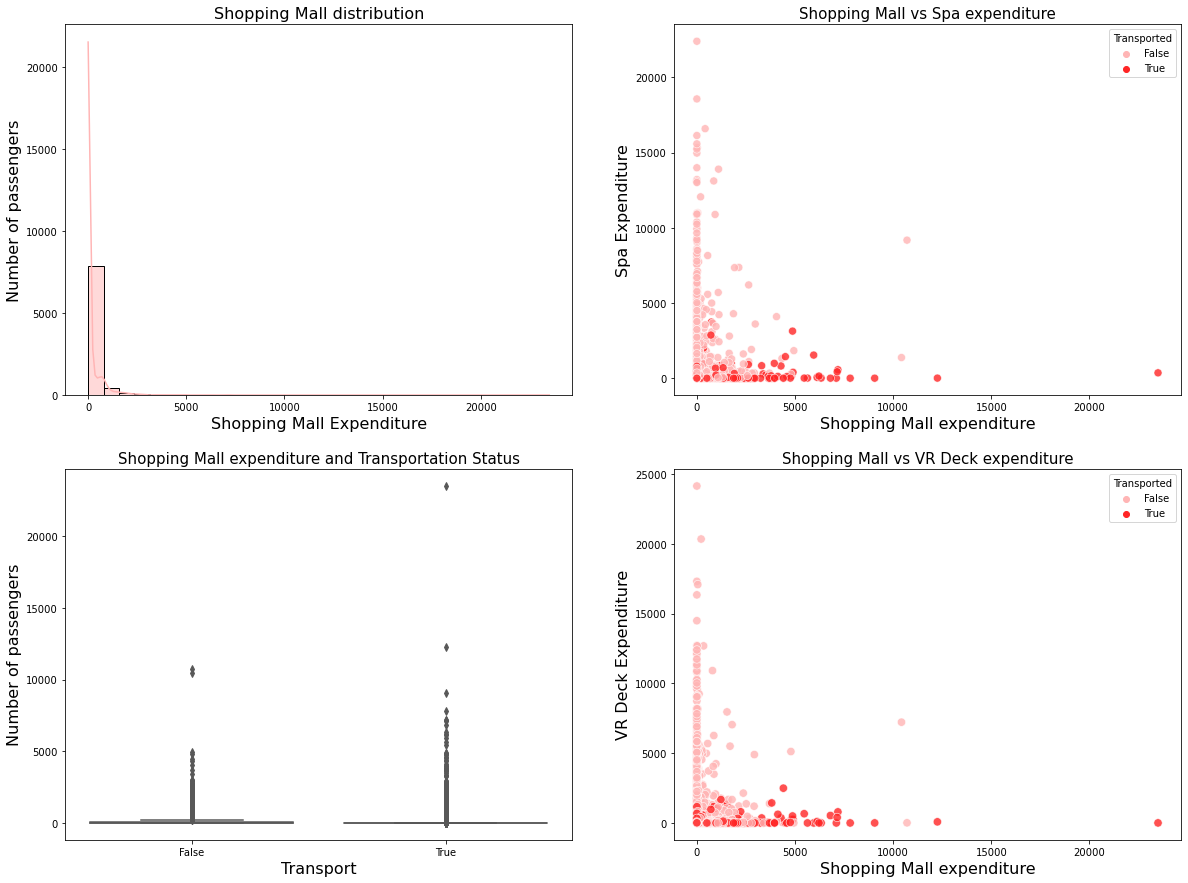

In [81]:
plt.figure(figsize=(20,15))
color=sns.color_palette('seismic')

plt.subplot(2,2,1)
sns.histplot(x = shop, bins = 30,  color=color[3],kde=True)
plt.title('Shopping Mall distribution', fontsize = 16)
plt.xlabel('Shopping Mall Expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)

plt.subplot(2,2,2)
sns.scatterplot(x = shop, y = train_df.Spa, hue=train_df.Transported, palette=color[3:5], s=65, alpha = 0.8)
plt.title('Shopping Mall vs Spa expenditure', fontsize = 15)
plt.xlabel('Shopping Mall expenditure', fontsize=16)
plt.ylabel('Spa Expenditure', fontsize = 16)

plt.subplot(2,2,3)
sns.boxplot(x = train_df.Transported, y = shop, palette=color[3:5],)
plt.title('Shopping Mall expenditure and Transportation Status', fontsize = 15)
plt.xlabel('Transport', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)

plt.subplot(2,2,4)
sns.scatterplot(x = shop, y = train_df.VRDeck, hue=train_df.Transported, palette=color[3:5], s=70, alpha = 0.8)
plt.title('Shopping Mall vs VR Deck expenditure', fontsize = 15)
plt.xlabel('Shopping Mall expenditure', fontsize=16)
plt.ylabel('VR Deck Expenditure', fontsize = 16)

# Spa 
### Amount the passenger has billed at Spa of the Spaceship Titanic.


In [82]:
print(f'{round(train_df.Spa.isnull().sum()/len(train_df.Spa)*100,2)}% data is missing or {train_df.Spa.isnull().sum()} values out of {len(train_df.Spa)}')

2.11% data is missing or 183 values out of 8693


### 2.11% data is missing or 183 values out of 8693

In [83]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,cabin_Deck,cabin_Num,cabin_Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A,98.0,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G,1499.0,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G,1500.0,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E,608.0,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E,608.0,S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


Text(0, 0.5, 'VR Deck Expenditure')

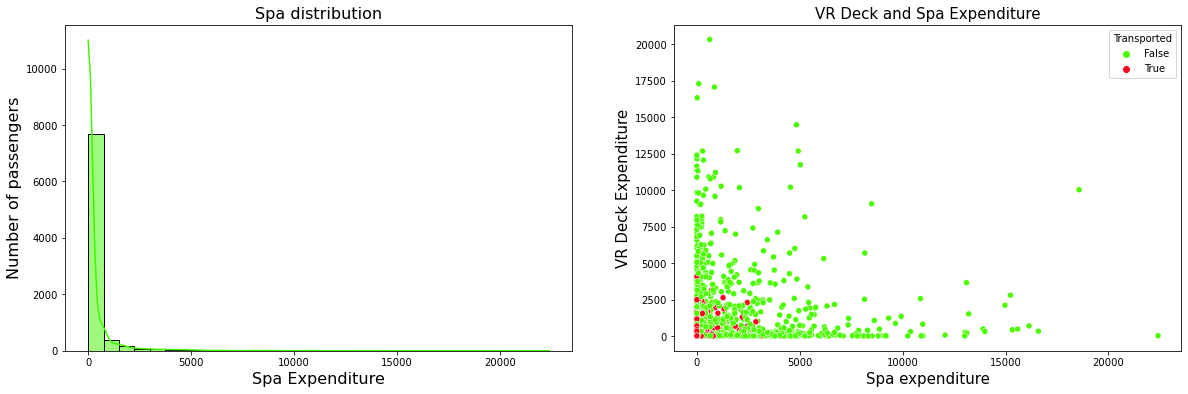

In [84]:
plt.figure(figsize=(20,6))
color = sns.color_palette('prism_r')

plt.subplot(1,2,1)
sns.histplot(x = train_df.Spa, bins = 30,  color=color[3],kde=True)
plt.title('Spa distribution', fontsize = 16)
plt.xlabel('Spa Expenditure', fontsize=16)
plt.ylabel('Number of passengers', fontsize = 16)

plt.subplot(1,2,2)
sns.scatterplot(x = train_df.Spa, y = train_df.VRDeck, hue=train_df.Transported, palette=color[1:3])
plt.title('VR Deck and Spa Expenditure', fontsize = 15)
plt.xlabel('Spa expenditure', fontsize=15)
plt.ylabel('VR Deck Expenditure', fontsize=15)


# Data Preprocessing

## Handling Missing Data

In [85]:
transported = train_df.pop('Transported')

In [86]:
test_pass_id = test_df['PassengerId']

In [87]:
train_pass_id = train_df['PassengerId']

In [88]:
train_df['is_train'] = True
test_df['is_train'] = False

df = pd.concat([train_df, test_df])

In [89]:
df.head()

,PassengerId,HomePlanet,CryoSleep,cabin_Deck,cabin_Num,cabin_Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,is_train
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,True
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,True
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,True
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   cabin_Deck    12671 non-null  object 
 4   cabin_Num     12671 non-null  float64
 5   cabin_Side    12671 non-null  object 
 6   Destination   12696 non-null  object 
 7   Age           12700 non-null  float64
 8   VIP           12674 non-null  object 
 9   RoomService   12707 non-null  float64
 10  FoodCourt     12681 non-null  float64
 11  ShoppingMall  12664 non-null  float64
 12  Spa           12686 non-null  float64
 13  VRDeck        12702 non-null  float64
 14  Name          12676 non-null  object 
 15  is_train      12970 non-null  bool   
dtypes: bool(1), float64(7), object(8)
memory usage: 1.6+ MB


In [91]:
# Let's drop the name and passenger id column now because it doesn't make any useful contribution to our model and we keep it for future engineering
name = df.pop('Name')
pass_id = df.pop('PassengerId')

In [92]:
from sklearn.compose import make_column_transformer, make_column_selector

In [93]:
selector = make_column_selector(dtype_include=object)
categorical_data_columns = selector(df)
cat_train_data = df[categorical_data_columns]
cat_train_data.head()

,HomePlanet,CryoSleep,cabin_Deck,cabin_Side,Destination,VIP
0,Europa,False,B,P,TRAPPIST-1e,False
1,Earth,False,F,S,TRAPPIST-1e,False
2,Europa,False,A,S,TRAPPIST-1e,True
3,Europa,False,A,S,TRAPPIST-1e,False
4,Earth,False,F,S,TRAPPIST-1e,False


In [94]:
con_selector = make_column_selector(dtype_exclude=[object, bool])
continuous_data_columns = con_selector(df)
cont_train_data = df[continuous_data_columns]
cont_train_data.head()

,cabin_Num,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0
1,0.0,24.0,109.0,9.0,25.0,549.0,44.0
2,0.0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,0.0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,1.0,16.0,303.0,70.0,151.0,565.0,2.0


https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

In [95]:
from sklearn.impute import SimpleImputer

In [96]:
imputer = SimpleImputer(missing_values= np.nan ,strategy='mean')
imputer = imputer.fit(df[continuous_data_columns])
df[continuous_data_columns] = imputer.transform(df[continuous_data_columns])

In [97]:
mode_imputer = SimpleImputer(missing_values= np.nan , strategy='most_frequent')
mode_imputer = mode_imputer.fit(df[categorical_data_columns])
df[categorical_data_columns] = mode_imputer.transform(df[categorical_data_columns])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  object 
 1   CryoSleep     12970 non-null  object 
 2   cabin_Deck    12970 non-null  object 
 3   cabin_Num     12970 non-null  float64
 4   cabin_Side    12970 non-null  object 
 5   Destination   12970 non-null  object 
 6   Age           12970 non-null  float64
 7   VIP           12970 non-null  object 
 8   RoomService   12970 non-null  float64
 9   FoodCourt     12970 non-null  float64
 10  ShoppingMall  12970 non-null  float64
 11  Spa           12970 non-null  float64
 12  VRDeck        12970 non-null  float64
 13  is_train      12970 non-null  bool   
dtypes: bool(1), float64(7), object(6)
memory usage: 1.4+ MB


## Label encoding of categorical variables

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
def label_encode(df,col):
    df[col] = LabelEncoder().fit_transform(df[col])
    return df[col]

In [101]:
categorical_data_columns

['HomePlanet', 'CryoSleep', 'cabin_Deck', 'cabin_Side', 'Destination', 'VIP']

In [102]:
for col in categorical_data_columns:
    df[col] = label_encode(df,col)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12970 non-null  int32  
 1   CryoSleep     12970 non-null  int32  
 2   cabin_Deck    12970 non-null  int32  
 3   cabin_Num     12970 non-null  float64
 4   cabin_Side    12970 non-null  int32  
 5   Destination   12970 non-null  int32  
 6   Age           12970 non-null  float64
 7   VIP           12970 non-null  int32  
 8   RoomService   12970 non-null  float64
 9   FoodCourt     12970 non-null  float64
 10  ShoppingMall  12970 non-null  float64
 11  Spa           12970 non-null  float64
 12  VRDeck        12970 non-null  float64
 13  is_train      12970 non-null  bool   
dtypes: bool(1), float64(7), int32(6)
memory usage: 1.1 MB


## Numeric Data Normalization 

In [104]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# The transformation is given as below
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

In [105]:
minmax_scaler = MinMaxScaler()

In [106]:
scaler = StandardScaler()

In [107]:
continuous_data_columns

['cabin_Num',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [108]:
for col in continuous_data_columns:
    df[col] = minmax_scaler.fit_transform(np.array(df[col]).reshape(-1,1))

In [109]:
df['cabin_Deck'] = minmax_scaler.fit_transform(np.array(df['cabin_Deck']).reshape(-1,1))

In [110]:
df

,HomePlanet,CryoSleep,cabin_Deck,cabin_Num,cabin_Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,is_train
0,1,0,0.142857,0.000000,0,2,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,True
1,0,0,0.714286,0.000000,1,2,0.303797,0,0.007608,0.000302,0.001064,0.024500,0.001823,True
2,1,0,0.000000,0.000000,1,2,0.734177,1,0.003001,0.119948,0.000000,0.299670,0.002030,True
3,1,0,0.000000,0.000000,1,2,0.417722,0,0.000000,0.043035,0.015793,0.148563,0.007997,True
4,0,0,0.714286,0.000528,1,2,0.202532,0,0.021149,0.002348,0.006428,0.025214,0.000083,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,0.857143,0.789863,1,2,0.430380,0,0.000000,0.000000,0.000000,0.000000,0.000000,False
4273,0,0,0.714286,0.318692,1,2,0.531646,0,0.000000,0.028410,0.000724,0.000446,0.005967,False
4274,2,1,0.428571,0.156283,0,0,0.364202,0,0.000000,0.000000,0.000000,0.000000,0.000000,False
4275,1,0,0.428571,0.156811,0,2,0.364202,0,0.000000,0.089894,0.000000,0.000000,0.021672,False


In [111]:
separate = df['is_train'] == True
train_df = df[separate]
test_df = df[~separate]

In [112]:
train_df = train_df.drop('is_train', axis=1)
print(train_df.shape)
train_df.head()

(8693, 13)


,HomePlanet,CryoSleep,cabin_Deck,cabin_Num,cabin_Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,0.142857,0.000000,0,2,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,0.714286,0.000000,1,2,0.303797,0,0.007608,0.000302,0.001064,0.024500,0.001823
2,1,0,0.000000,0.000000,1,2,0.734177,1,0.003001,0.119948,0.000000,0.299670,0.002030
3,1,0,0.000000,0.000000,1,2,0.417722,0,0.000000,0.043035,0.015793,0.148563,0.007997
4,0,0,0.714286,0.000528,1,2,0.202532,0,0.021149,0.002348,0.006428,0.025214,0.000083


In [113]:
test_df = test_df.drop('is_train', axis=1)
print(test_df.shape)
test_df.head()

(4277, 13)


,HomePlanet,CryoSleep,cabin_Deck,cabin_Num,cabin_Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,0.857143,0.001584,1,2,0.341772,0,0.000000,0.000000,0.00000,0.000000,0.000000
1,0,0,0.714286,0.002112,1,2,0.240506,0,0.000000,0.000302,0.00000,0.125982,0.000000
2,1,1,0.285714,0.000000,1,0,0.392405,0,0.000000,0.000000,0.00000,0.000000,0.000000
3,1,0,0.285714,0.000528,1,2,0.481013,0,0.000000,0.223124,0.00000,0.008077,0.024241
4,0,0,0.714286,0.002640,1,2,0.253165,0,0.000698,0.000000,0.02703,0.000000,0.000000


<AxesSubplot:>

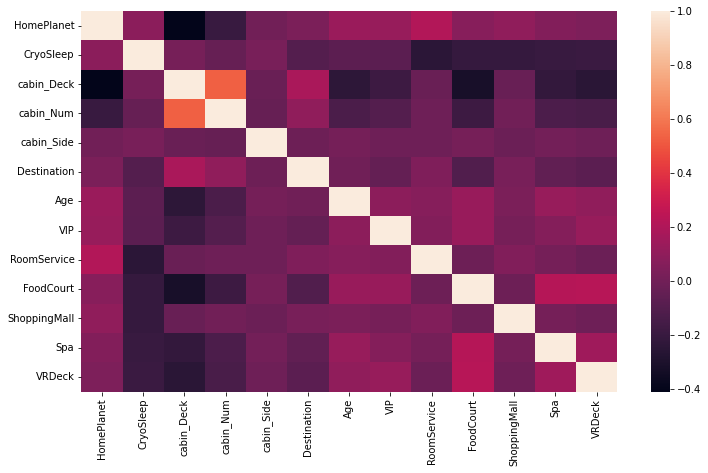

In [114]:
plt.figure(figsize=(12,7))
torr = train_df.corr()
sns.heatmap(torr)

# Base Classifier

In [115]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [116]:
logrcv = LogisticRegressionCV(Cs=[1,3,5,7,10], cv=5, penalty='l2', random_state=2022)

In [117]:
y_train = transported.apply(lambda x : 1.0 if x == True else 0.0)

In [118]:
y_train.value_counts()

1.0    4378
0.0    4315
Name: Transported, dtype: int64

In [119]:
fitted = logrcv.fit(X= train_df, y = y_train)

In [120]:
fitted.C_

array([10])

In [121]:
fitted.scores_

{1.0: array([[0.75618171, 0.75905693, 0.76250719, 0.76078206, 0.76250719],
        [0.76653249, 0.77170788, 0.77630822, 0.77975848, 0.7826337 ],
        [0.75560667, 0.76998275, 0.77515814, 0.77975848, 0.78378378],
        [0.76294591, 0.77502877, 0.77790564, 0.77733026, 0.77905639],
        [0.76582278, 0.77502877, 0.77560414, 0.77905639, 0.78193326]])}

In [122]:
fitted.coef_

array([[  0.25851246,   1.67570842,  -2.31513668,   0.54493354,
          0.53884811,  -0.2056346 ,  -0.79269299,  -0.39484869,
        -18.04329094,  12.95703895,  10.55298041, -27.34609587,
        -26.5233491 ]])

In [123]:
logr = LogisticRegression(C=20)

In [124]:
fit_train = logr.fit(train_df, y_train)

In [125]:
predictions = fit_train.predict(test_df)

In [126]:
def generate_submission(preds):
    test_arr = np.column_stack((test_pass_id.values, preds) )
    test_predict = pd.DataFrame(columns = ['PassengerId', 'Transported'], data = test_arr)
    test_predict.Transported = test_predict.Transported.apply(lambda x : True if x == 1.0 else False)
    test_predict.head()
    test_predict.to_csv('submission.csv', index=False)

In [127]:
generate_submission(predictions)

### Classification score is: 0.78770 

### We can improve it further

###  Till now, I have set up the data good enough for training a model. Steps were to Explore the data through visualization, Handle missing data (filled the data with mode/mean), perform one hot encoding on categorical variables, normalize numeric data. Now, let's do some feature engineering to try to boost the performance with the help of the data.

## Let's try different algorithms 
### 1. Knearest Neighbors
### 2. Decision Trees
### 3. Random Forests
### 4. XGBoost
### 5. Support Vector Machines

# KNN

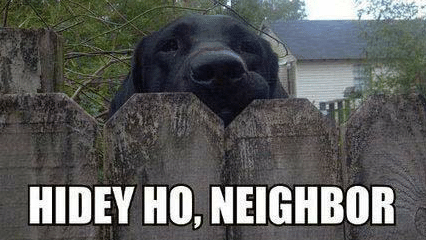

In [128]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

X_train = train_df
Y_train = y_train

TRAIN_SCORES = []
VALID_SCORES  = [] 


params = list(range(1,20))

classifier = KNeighborsClassifier()

folds = 5

kf = KFold(n_splits=folds)

for p in params:

    training_scores = []
    crossval_scores = []
    classifier.n_neighbors = p

    for i in range(folds):
        
        result = next(kf.split(X_train),None)
        x_training = X_train.iloc[result[0]]
        x_cv = X_train.iloc[result[1]]

        y_training = y_train.iloc[result[0]]
        y_cv = y_train.iloc[result[1]]
      
        model = classifier.fit(x_training,y_training)
        training_scores.append(model.score(x_training,y_training))
        crossval_scores.append(model.score(x_cv,y_cv))
    TRAIN_SCORES.append(np.mean(training_scores))
    VALID_SCORES.append(np.mean(crossval_scores))

Text(0.5, 1.0, 'Hyper-parameter VS accuracy plot')

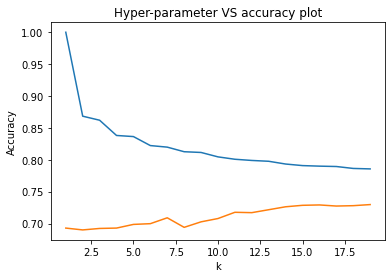

In [129]:
plt.plot(params,TRAIN_SCORES, label='train cruve')
plt.plot(params,VALID_SCORES, label='test cruve')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title('Hyper-parameter VS accuracy plot')

In [130]:
np.argmax(np.array(VALID_SCORES))

18

In [131]:
# Looks like the best neighbor is 5
KNN_best = KNeighborsClassifier(18,weights='uniform', )
model_best = KNN_best.fit(train_df, y_train)

preds = model_best.predict(test_df)


In [132]:
model_best.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 18,
 'p': 2,
 'weights': 'uniform'}

In [133]:
generate_submission(preds)

# Decision Tree Classifier

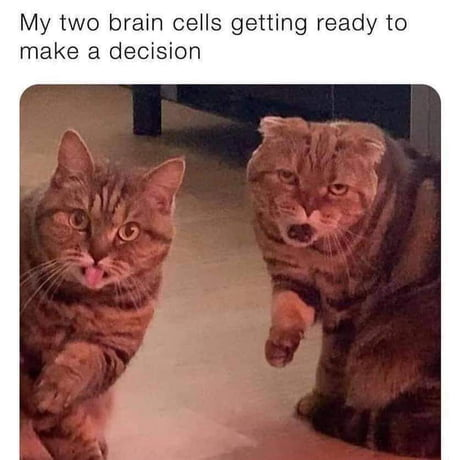

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
params_dict = {'criterion':['gini', 'entropy'],
              'max_depth': [10,20,30,40,50,60],
              'min_samples_split':[0.1,0.3,0.5,0.6]}

In [137]:
clf =  DecisionTreeClassifier(random_state=2022)

In [138]:
grid_clf = GridSearchCV(clf, param_grid=params_dict,cv=5, verbose=1, refit=True)

In [139]:
grid_clf.fit(X=train_df, y =  y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50, 60],
                         'min_samples_split': [0.1, 0.3, 0.5, 0.6]},
             verbose=1)

In [140]:
grid_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 0.1}

In [141]:
grid_clf.predict(test_df)

array([1., 0., 1., ..., 1., 0., 1.])

In [142]:
generate_submission(grid_clf.predict(test_df))

# Random Forest Classifier

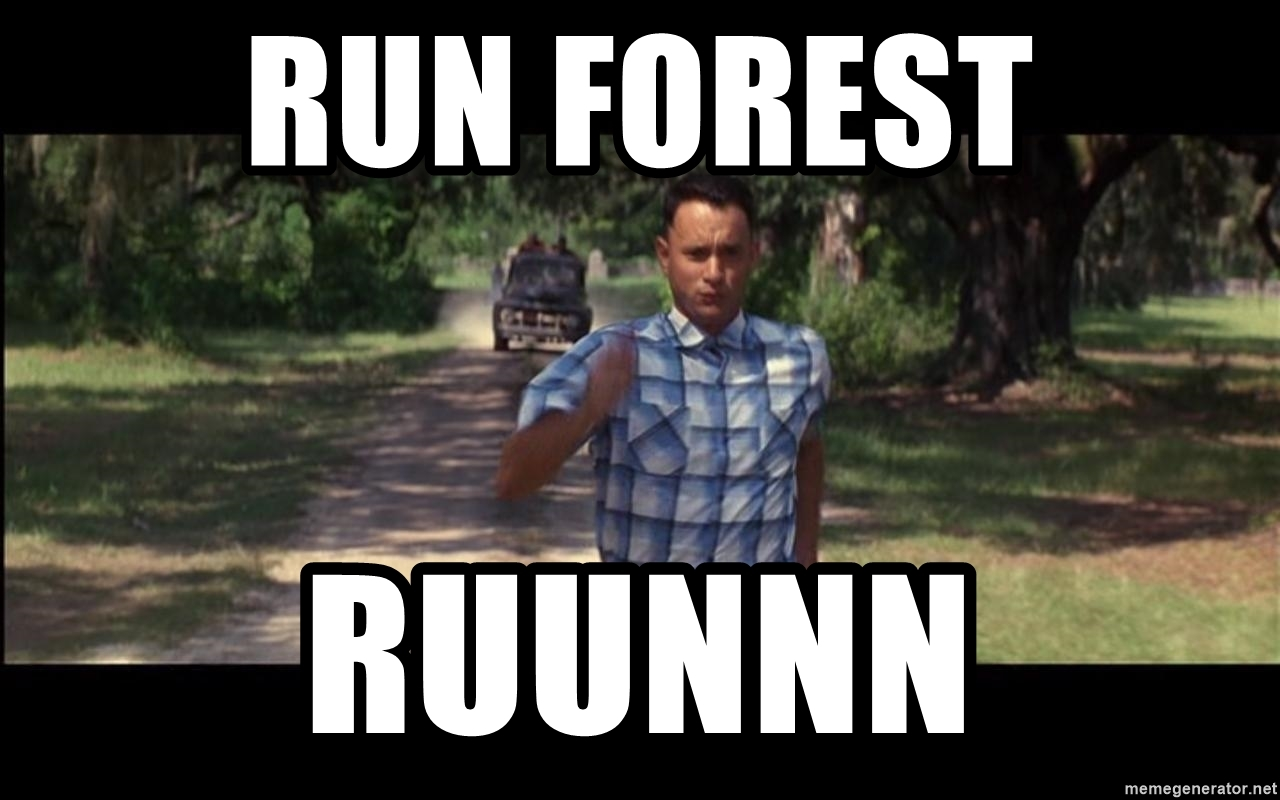

In [143]:
params_dict_rf = {'max_depth': [8,10,12,14,20],
                  'min_samples_leaf':[0.1,0.3,0.5,0.6],
                  'n_estimators':[100, 200, 400, 500]}

In [144]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


In [145]:
#grid_rf = GridSearchCV(rf, param_grid=params_dict_rf)
#grid_rf.fit(X = train_df, y = y_train)

In [146]:
#grid_rf.best_estimator_

In [147]:
#grid_rf.best_params_

In [148]:
#grid_rf.feature_names_in_

In [149]:
rf = RandomForestClassifier(n_estimators=400, max_depth=18, min_samples_leaf=0.001, bootstrap=True,
                            oob_score=True, random_state=420, verbose=0)
rf.fit(X=train_df, y =y_train)
rf.oob_score_

0.8063959507649833

In [150]:
generate_submission(rf.predict(test_df))

# Support Vector Machines

In [151]:
from sklearn.svm import SVC, NuSVC

In [152]:
grid_svc = {'C': [1,2,3,5,8,10],
           'kernel': ['linear', 'rbf'],
           'gamma': ['auto','scale']}

In [153]:
svc = SVC()

In [154]:
grid_svc = GridSearchCV(svc, param_grid=grid_svc)

In [155]:
#grid_svc.fit(X=train_df, y = y_train)

In [156]:
#grid_svc.best_estimator_

In [157]:
#grid_svc.best_score_

In [158]:
#grid_svc.feature_names_in_

In [159]:
svc = SVC(C=10,kernel='linear')

In [160]:
svc.fit(X=train_df, y=y_train)

SVC(C=10, kernel='linear')

In [161]:
svc.fit_status_

0

In [162]:
svc.n_support_

array([2196, 2194])

In [163]:
svc_predictions = svc.predict(test_df)

In [164]:
svc_predictions

array([1., 0., 1., ..., 1., 1., 1.])

In [165]:
generate_submission(svc_predictions)

# XgBoost Classifier

In [166]:
import xgboost as xgb
from xgboost import cv
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [167]:
from scipy.stats import uniform, randint
params = {
    "colsample_bytree": [0.5,0.7,0.8,0.9],
    "learning_rate": [0.3,0.5,0.7,0.8,0.9], # default 0.1 
    "max_depth": [5,6,7,8,10] # default 3 
}

In [168]:
xgb_clf = xgb.XGBClassifier()

In [169]:
search = GridSearchCV(xgb_clf, param_grid=params,  refit =True, 
                      cv=3, verbose=1, n_jobs=1,return_train_score=True)
search.fit(train_df, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [170]:
search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [171]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [172]:
report_best_scores(search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.765 (std: 0.041)
Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 10}

Model with rank: 2
Mean validation score: 0.760 (std: 0.043)
Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 6}

Model with rank: 3
Mean validation score: 0.760 (std: 0.040)
Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 7}



In [173]:
data_dmatrix = xgb.DMatrix(data=train_df,label=y_train)

In [174]:

params = {
    'booster': 'gbtree',
    'learning_rate': 0.3,
    'colsample_bytree': 0.4
}
xgb_cv = cv(dtrain=data_dmatrix, 
            params=params, 
            nfold=5, 
            num_boost_round=50, 
            early_stopping_rounds=5, 
            metrics="logloss", 
            as_pandas=True, 
            seed=1)

In [175]:
xgb_clf = xgb.XGBClassifier(n_estimators = 1000,
                           objective='binary:logistic',
                           max_depth = 3,
                           min_child_weight = 5,
                           learning_rate = 0.9, 
                           early_stopping_rounds=5)

In [176]:
X_train, XVal, yTrain, yVal = train_test_split(train_df, y_train, random_state=19, test_size=0.2)

In [177]:
xgb_clf.fit(X=train_df, y = y_train, eval_set=[(XVal, yVal)] )

[0]	validation_0-logloss:0.52610
[1]	validation_0-logloss:0.47331
[2]	validation_0-logloss:0.45622
[3]	validation_0-logloss:0.44041
[4]	validation_0-logloss:0.43207
[5]	validation_0-logloss:0.41852
[6]	validation_0-logloss:0.41225
[7]	validation_0-logloss:0.40262
[8]	validation_0-logloss:0.39875
[9]	validation_0-logloss:0.39671
[10]	validation_0-logloss:0.39632
[11]	validation_0-logloss:0.39358
[12]	validation_0-logloss:0.39219
[13]	validation_0-logloss:0.38318
[14]	validation_0-logloss:0.38162
[15]	validation_0-logloss:0.37930
[16]	validation_0-logloss:0.37714
[17]	validation_0-logloss:0.37285
[18]	validation_0-logloss:0.36941
[19]	validation_0-logloss:0.36567
[20]	validation_0-logloss:0.36398
[21]	validation_0-logloss:0.36299
[22]	validation_0-logloss:0.36005
[23]	validation_0-logloss:0.35653
[24]	validation_0-logloss:0.35564
[25]	validation_0-logloss:0.35331
[26]	validation_0-logloss:0.35223
[27]	validation_0-logloss:0.35095
[28]	validation_0-logloss:0.34702
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=5, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [178]:
xgb_clf = xgb.XGBClassifier(n_estimators = 795,
                           objective='binary:logistic',
                           max_depth = 4,
                           min_child_weight = 2,
                           colsample_bytree=0.7,
                           learning_rate = 0.9, 
                           )

In [179]:
xgb_clf.fit(train_df, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=795,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [180]:
xgb_clf.predict(test_df)
generate_submission(xgb_clf.predict(test_df))

array([1, 0, 1, ..., 1, 1, 1])

In [182]:
parameters = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
              "n_estimators": [200, 350, 500, 750],
              "max_depth": [3, 6, 8]
              }

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

In [184]:
GridSearchCV_gbcl = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=parameters, 
                                cv=10,
                                verbose=1, 
                                n_jobs=3,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [185]:
GridSearchCV_gbcl.fit(train_df, y_train)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'loss': ['deviance'], 'max_depth': [3, 6, 8],
                         'n_estimators': [200, 350, 500, 750]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [186]:
GridSearchCV_gbcl.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, n_estimators=200)

In [187]:
GridSearchCV_gbcl.best_params_

{'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 3,
 'n_estimators': 200}

In [188]:
GridSearchCV_gbcl.best_score_

0.7923676309141171

In [189]:
gbcl= GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=200)

In [191]:
gbcl_fit = gbcl.fit(train_df, y_train)

In [193]:
generate_submission(gbcl_fit.predict(test_df))

## New Score - 0.80500